In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv('./Data/Preprocessed_Data.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = data.copy()

In [4]:
loan_data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       1077501    1296599       5000         5000           4975.0   
1       1077430    1314167       2500         2500           2500.0   
2       1077175    1313524       2400         2400           2400.0   
3       1076863    1277178      10000        10000          10000.0   
4       1075358    1311748       3000         3000           3000.0   
...         ...        ...        ...          ...              ...   
466280  8598660    1440975      18400        18400          18400.0   
466281  9684700   11536848      22000        22000          22000.0   
466282  9584776   11436914      20700        20700          20700.0   
466283  9604874   11457002       2000         2000           2000.0   
466284  9199665   11061576      10000        10000           9975.0   

              term  int_rate  installment grade sub_grade  ... addr_state:TX  \
0        36 months     10.65       162.87     B        B2  ...             0   
1        60 months     15.27        59.83     C        C4  ...             0   
2        36 months     15.96        84.33     C        C5  ...             0   
3        36 months     13.49       339.31     C        C1  ...             0   
4        60 months     12.69        67.79     B        B5  ...             0   
...            ...       ...          ...   ...       ...  ...           ...   
466280   60 months     14.47       432.64     C        C2  ...             1   
466281   60 months     19.97       582.50     D        D5  ...             0   
466282   60 months     16.99       514.34     D        D1  ...             0   
466283   36 months      7.90        62.59     A        A4  ...             0   
466284   36 months     19.20       367.58     D        D3  ...             0   

       addr_state:UT addr_state:VA  addr_state:VT addr_state:WA addr_state:WI  \
0                  0             0              0             0             0   
1                  0             0              0             0             0   
2                  0             0              0             0             0   
3                  0             0              0             0             0   
4                  0             0              0             0             0   
...              ...           ...            ...           ...           ...   
466280             0             0              0             0             0   
466281             0             0              0             0             0   
466282             0             0              0             0             0   
466283             0             0              0             0             0   
466284             0             0              0             0             0   

       addr_state:WV addr_state:WY initial_list_status:f initial_list_status:w  
0                  0             0                     1                     0  
1                  0             0                     1                     0  
2                  0             0                     1                     0  
3                  0             0                     1                     0  
4                  0             0                     1                     0  
...              ...           ...                   ...                   ...  
466280             0             0                     0                     1  
466281             0             0                     1                     0  
466282             0             0                     1                     0  
466283             0             0                     0                     1  
466284             0             0                     1                     0  

[466285 rows x 206 columns]

# PD Model

## Data Preparation for PD Model

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [5]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].unique())

9
['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [6]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
print(loan_data['loan_status'].nunique())
print(loan_data['loan_status'].count())
print(len(loan_data['loan_status']))

9
466285
466285


In [8]:
# Get the proportion (percentage) for each loan status 
round(loan_data['loan_status'].value_counts() / loan_data['loan_status'].count(),3)

Current                                                0.481
Fully Paid                                             0.396
Charged Off                                            0.091
Late (31-120 days)                                     0.015
In Grace Period                                        0.007
Does not meet the credit policy. Status:Fully Paid     0.004
Late (16-30 days)                                      0.003
Default                                                0.002
Does not meet the credit policy. Status:Charged Off    0.002
Name: loan_status, dtype: float64

- Good / Non Default = 1
        Current, Fully Paid, In Grace Period, Does not meet the credit policy, Status:Fully Paid, Late (16-30 days)
- Bad / Default = 0
        Charged Off, Late (31-120 days), Default,  Does not meet the credit policy. Status:Charged Off

In [9]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Default',
                               'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [10]:
## Alternative syntax to make loan_data['good_bad']

# good_bad = []
# bad = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# for i in loan_data['loan_status']:
#     if i in bad:
#         good_bad.append(0)
#     else:
#         good_bad.append(1)
        
# loan_data['good_bad'] = good_bad

In [11]:
loan_data[['loan_status', 'good_bad']]

loan_status  good_bad
0        Fully Paid         1
1       Charged Off         0
2        Fully Paid         1
3        Fully Paid         1
4           Current         1
...             ...       ...
466280      Current         1
466281  Charged Off         0
466282      Current         1
466283   Fully Paid         1
466284      Current         1

[466285 rows x 2 columns]

In [12]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

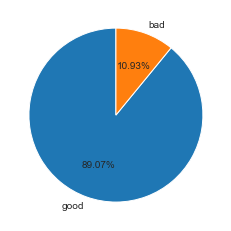

In [13]:
plt.pie(loan_data['good_bad'].value_counts(), autopct='%.2f%%', startangle=90,
       labels=['good','bad'])
plt.show()

In [14]:
len(loan_data.columns)

207

In [15]:
loan_data.shape

(466285, 207)

## Splitting Data
train_test_split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
# loan_data_inputs_train
X_train.shape

(373028, 206)

In [20]:
# loan_data_targets_train
y_train.shape

(373028,)

In [21]:
# loan_data_inputs_test
X_test.shape

(93257, 206)

In [22]:
# # loan_data_targets_test
y_test.shape

(93257,)

## Data Preparation

**GOAL**

- Fine Classing Continuous variables. For Discrete variables don't need fine classing or splitting into categories because they are already categorical by definition
- Getting Weight od Evidence (WoE) & Information Value (IV) 

In [23]:
## rename the data train

# df_inputs_prepr = X_train
# df_targets_prepr = y_train


df_inputs_prepr = loan_data.drop('good_bad',axis=1)
df_targets_prepr = loan_data['good_bad']

#### EXAMPLE

Let's start with a simple variable `grade`. We want to assess its explanatory power with respect to the outcome of interest that is being a good or a bad borrower.

In [24]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

grade  good_bad
0          B         1
1          C         0
2          C         1
3          C         1
4          B         1
...      ...       ...
466280     C         1
466281     D         0
466282     D         1
466283     A         1
466284     D         1

[466285 rows x 2 columns]

In [25]:
df1.groupby('grade', as_index=False).count() 

grade  good_bad
0     A     74867
1     B    136929
2     C    125293
3     D     76888
4     E     35757
5     F     13229
6     G      3322

In [26]:
df1.groupby('grade', as_index=False).sum() 

grade  good_bad
0     A     71970
1     B    126170
2     C    110909
3     D     65040
4     E     28793
5     F     10037
6     G      2398

In [27]:
df1.groupby('grade', as_index=False).sum()

grade  good_bad
0     A     71970
1     B    126170
2     C    110909
3     D     65040
4     E     28793
5     F     10037
6     G      2398

In [28]:
df1.groupby('grade', as_index=False).sum()['good_bad'] / df1.groupby('grade', as_index=False).count()['good_bad']

0    0.961305
1    0.921426
2    0.885197
3    0.845906
4    0.805241
5    0.758712
6    0.721854
Name: good_bad, dtype: float64

In [29]:
df1.groupby('grade', as_index=False).mean() 

grade  good_bad
0     A  0.961305
1     B  0.921426
2     C  0.885197
3     D  0.845906
4     E  0.805241
5     F  0.758712
6     G  0.721854

In [30]:
df1 = pd.merge(df1.groupby('grade', as_index=False).count(), 
               df1.groupby('grade', as_index=False).mean(), on='grade')
df1

grade  good_bad_x  good_bad_y
0     A       74867    0.961305
1     B      136929    0.921426
2     C      125293    0.885197
3     D       76888    0.845906
4     E       35757    0.805241
5     F       13229    0.758712
6     G        3322    0.721854

In [31]:
df1.columns = ['grade', 'n_obs', 'prop_good']
df1

grade   n_obs  prop_good
0     A   74867   0.961305
1     B  136929   0.921426
2     C  125293   0.885197
3     D   76888   0.845906
4     E   35757   0.805241
5     F   13229   0.758712
6     G    3322   0.721854

In [32]:
df1['prop_bad'] = 1 - df1['prop_good']
df1

grade   n_obs  prop_good  prop_bad
0     A   74867   0.961305  0.038695
1     B  136929   0.921426  0.078574
2     C  125293   0.885197  0.114803
3     D   76888   0.845906  0.154094
4     E   35757   0.805241  0.194759
5     F   13229   0.758712  0.241288
6     G    3322   0.721854  0.278146

In [33]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()*100 #multiply by 100 to make it percantage
df1

grade   n_obs  prop_good  prop_bad  prop_n_obs
0     A   74867   0.961305  0.038695   16.056060
1     B  136929   0.921426  0.078574   29.365946
2     C  125293   0.885197  0.114803   26.870476
3     D   76888   0.845906  0.154094   16.489486
4     E   35757   0.805241  0.194759    7.668486
5     F   13229   0.758712  0.241288    2.837106
6     G    3322   0.721854  0.278146    0.712440

In [34]:
df1['n_obs']/df1['n_obs'].sum()*100

0    16.056060
1    29.365946
2    26.870476
3    16.489486
4     7.668486
5     2.837106
6     0.712440
Name: n_obs, dtype: float64

In [35]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = df1['prop_bad'] * df1['n_obs']
df1

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad
0     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0
1     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0
2     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0
4     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0
5     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0
6     G    3322   0.721854  0.278146    0.712440    2398.0    924.0

In [36]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()*100 #multiply by 100 to make it percantage
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()*100 #multiply by 100 to make it percantage
df1

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0   
1     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0   
2     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0   
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0   
4     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0   
5     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0   
6     G    3322   0.721854  0.278146    0.712440    2398.0    924.0   

   prop_n_good  prop_n_bad  
0    17.328932    5.683959  
1    30.379204   21.109323  
2    26.704662   28.221629  
3    15.660327   23.245958  
4     6.932777   13.663475  
5     2.416708    6.262753  
6     0.577390    1.812902

In [37]:
df1['WoE'] = np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1 = df1.sort_values('WoE')
df1 = df1.reset_index(drop=True)
df1
# In this way we'll see the categories where borrowers have the highest default rate first.

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0     G    3322   0.721854  0.278146    0.712440    2398.0    924.0   
1     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0   
2     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0   
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0   
4     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0   
5     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0   
6     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0   

   prop_n_good  prop_n_bad       WoE  
0     0.577390    1.812902 -1.144166  
1     2.416708    6.262753 -0.952214  
2     6.932777   13.663475 -0.678466  
3    15.660327   23.245958 -0.395001  
4    26.704662   28.221629 -0.055251  
5    30.379204   21.109323  0.364043  
6    17.328932    5.683959  1.114730

In [38]:
df1['IV'] = df1['WoE'] * (df1['prop_n_good'] - df1['prop_n_bad'])/100 #devided by 100 to keep it in range 0-1
df1['sum_IV'] = df1['IV'].sum()
df1

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0     G    3322   0.721854  0.278146    0.712440    2398.0    924.0   
1     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0   
2     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0   
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0   
4     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0   
5     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0   
6     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     0.577390    1.812902 -1.144166  0.014136  0.290782  
1     2.416708    6.262753 -0.952214  0.036623  0.290782  
2     6.932777   13.663475 -0.678466  0.045665  0.290782  
3    15.660327   23.245958 -0.395001  0.029963  0.290782  
4    26.704662   28.221629 -0.055251  0.000838  0.290782  
5    30.379204   21.109323  0.364043  0.033746  0.290782  
6    17.328932    5.683959  1.114730  0.129810  0.290782

`grade` has Information value 0.288636. it means `grade` has moderate predictive powers to the dependent variable (good_bad)

## Preprocessing Discrete Variables: Automating Calculations
Creating Function to simplify the step above & apply it to the all features with deiscrete variable

In [39]:
def Woe_IV_discrete (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values('WoE')
    df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

In [40]:
df_WoE_IV_grade = Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_WoE_IV_grade

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0     G    3322   0.721854  0.278146    0.712440    2398.0    924.0   
1     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0   
2     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0   
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0   
4     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0   
5     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0   
6     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     0.577390    1.812902 -1.144166  0.014136  0.290782  
1     2.416708    6.262753 -0.952214  0.036623  0.290782  
2     6.932777   13.663475 -0.678466  0.045665  0.290782  
3    15.660327   23.245958 -0.395001  0.029963  0.290782  
4    26.704662   28.221629 -0.055251  0.000838  0.290782  
5    30.379204   21.109323  0.364043  0.033746  0.290782  
6    17.328932    5.683959  1.114730  0.129810  0.290782

In [41]:
df_WoE_IV_Home = Woe_IV_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_WoE_IV_Home

home_ownership   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0          OTHER     182   0.791209  0.208791    0.039032     144.0     38.0   
1           NONE      50   0.840000  0.160000    0.010723      42.0      8.0   
2           RENT  188473   0.873897  0.126103   40.420129  164706.0  23767.0   
3            OWN   41704   0.891737  0.108263    8.943886   37189.0   4515.0   
4       MORTGAGE  235875   0.904017  0.095983   50.586015  213235.0  22640.0   
5            ANY       1   1.000000  0.000000    0.000214       1.0      0.0   

   prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0     0.034672    0.074557 -0.765617  0.000305     inf  
1     0.010113    0.015696 -0.439616  0.000025     inf  
2    39.657900   46.631220 -0.161980  0.011295     inf  
3     8.954365    8.858499  0.010764  0.000010     inf  
4    51.342709   44.420028  0.144832  0.010026     inf  
5     0.000241    0.000000       inf       inf     inf

In [42]:
df_WoE_IV_VerifStat = Woe_IV_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_WoE_IV_VerifStat

verification_status   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0            Verified  168055   0.872631  0.127369   36.041262  146650.0   
1     Source Verified  149993   0.895882  0.104118   32.167666  134376.0   
2        Not Verified  148237   0.905921  0.094079   31.791072  134291.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  21405.0    35.310377   41.996939 -0.173420  0.011596  0.020831  
1  15617.0    32.355044   30.640794  0.054438  0.000933  0.020831  
2  13946.0    32.334578   27.362267  0.166972  0.008302  0.020831

In [43]:
df_WoE_IV_purpose = Woe_IV_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_WoE_IV_purpose

purpose   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0       small_business    7013   0.784258  0.215742    1.504016    5500.0   
1          educational     422   0.791469  0.208531    0.090503     334.0   
2     renewable_energy     351   0.846154  0.153846    0.075276     297.0   
3               moving    2994   0.847361  0.152639    0.642097    2537.0   
4                house    2269   0.859850  0.140150    0.486612    1951.0   
5                other   23690   0.862009  0.137991    5.080584   20421.0   
6              medical    4602   0.866145  0.133855    0.986950    3986.0   
7              wedding    2343   0.878361  0.121639    0.502482    2058.0   
8             vacation    2487   0.882187  0.117813    0.533365    2194.0   
9   debt_consolidation  274195   0.886690  0.113310   58.804165  243126.0   
10    home_improvement   26537   0.901835  0.098165    5.691155   23932.0   
11      major_purchase    9828   0.904457  0.095543    2.107724    8889.0   
12                 car    5397   0.910876  0.089124    1.157447    4916.0   
13         credit_card  104157   0.913774  0.086226   22.337626   95176.0   

      n_bad  prop_n_good  prop_n_bad       WoE        IV   sum_IV  
0    1513.0     1.324290    2.968529 -0.807190  0.013272  0.03698  
1      88.0     0.080420    0.172657 -0.764040  0.000705  0.03698  
2      54.0     0.071512    0.105949 -0.393096  0.000135  0.03698  
3     457.0     0.610859    0.896641 -0.383790  0.001097  0.03698  
4     318.0     0.469762    0.623921 -0.283798  0.000438  0.03698  
5    3269.0     4.916967    6.413828 -0.265764  0.003978  0.03698  
6     616.0     0.959749    1.208601 -0.230548  0.000574  0.03698  
7     285.0     0.495525    0.559174 -0.120843  0.000077  0.03698  
8     293.0     0.528271    0.574871 -0.084535  0.000039  0.03698  
9   31069.0    58.539862   60.957856 -0.040475  0.000979  0.03698  
10   2605.0     5.762345    5.111050  0.119940  0.000781  0.03698  
11    939.0     2.140293    1.842332  0.149910  0.000447  0.03698  
12    481.0     1.183674    0.943729  0.226539  0.000544  0.03698  
13   8981.0    22.916471   17.620860  0.262772  0.013915  0.03698

In [44]:
df_WoE_IV_addrState = Woe_IV_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_WoE_IV_addrState

addr_state  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          NE     14   0.428571  0.571429    0.003002      6.0     8.0   
1          IA     14   0.785714  0.214286    0.003002     11.0     3.0   
2          NV   6519   0.862862  0.137138    1.398072   5625.0   894.0   
3          HI   2487   0.873743  0.126257    0.533365   2173.0   314.0   
4          FL  31637   0.874640  0.125360    6.784906  27671.0  3966.0   
5          AL   5853   0.876474  0.123526    1.255241   5130.0   723.0   
6          NY  40242   0.883182  0.116818    8.630344  35541.0  4701.0   
7          LA   5489   0.883403  0.116597    1.177177   4849.0   640.0   
8          NM   2588   0.884467  0.115533    0.555025   2289.0   299.0   
9          OK   4117   0.884625  0.115375    0.882936   3642.0   475.0   
10         NC  12682   0.884876  0.115124    2.719796  11222.0  1460.0   
11         MO   7508   0.884923  0.115077    1.610174   6644.0   864.0   
12         MD  10974   0.885274  0.114726    2.353496   9715.0  1259.0   
13         NJ  18061   0.885665  0.114335    3.873382  15996.0  2065.0   
14         VA  14222   0.886092  0.113908    3.050066  12602.0  1620.0   
15         CA  71450   0.886396  0.113604   15.323247  63333.0  8117.0   
16         AZ  10712   0.888350  0.111650    2.297307   9516.0  1196.0   
17         MI  11549   0.888735  0.111265    2.476811  10264.0  1285.0   
18         UT   3428   0.888856  0.111144    0.735173   3047.0   381.0   
19         TN   5984   0.888870  0.111130    1.283335   5319.0   665.0   
20         AR   3488   0.889335  0.110665    0.748040   3102.0   386.0   
21         PA  16424   0.889978  0.110022    3.522309  14617.0  1807.0   
22         RI   2050   0.890732  0.109268    0.439645   1826.0   224.0   
23         OH  15237   0.891842  0.108158    3.267744  13589.0  1648.0   
24         KY   4438   0.891843  0.108157    0.951778   3958.0   480.0   
25         DE   1272   0.892296  0.107704    0.272795   1135.0   137.0   
26         MN   8158   0.892498  0.107502    1.749574   7281.0   877.0   
27         SD    980   0.892857  0.107143    0.210172    875.0   105.0   
28         MA  11072   0.893605  0.106395    2.374513   9894.0  1178.0   
29         IN   6525   0.894100  0.105900    1.399359   5834.0   691.0   
30         GA  14975   0.896361  0.103639    3.211555  13423.0  1552.0   
31         WA  10517   0.897689  0.102311    2.255488   9441.0  1076.0   
32         WI   5911   0.899171  0.100829    1.267680   5315.0   596.0   
33         OR   5949   0.899479  0.100521    1.275829   5351.0   598.0   
34         TX  36439   0.904251  0.095749    7.814748  32950.0  3489.0   
35         IL  18612   0.905652  0.094348    3.991550  16856.0  1756.0   
36         CT   7204   0.906302  0.093698    1.544978   6529.0   675.0   
37         MT   1396   0.906877  0.093123    0.299388   1266.0   130.0   
38         CO   9739   0.908615  0.091385    2.088637   8849.0   890.0   
39         SC   5583   0.908651  0.091349    1.197336   5073.0   510.0   
40         KS   4190   0.910501  0.089499    0.898592   3815.0   375.0   
41         VT    905   0.912707  0.087293    0.194087    826.0    79.0   
42         AK   1251   0.912870  0.087130    0.268291   1142.0   109.0   
43         MS   1226   0.914356  0.085644    0.262929   1121.0   105.0   
44         ID     12   0.916667  0.083333    0.002574     11.0     1.0   
45         NH   2232   0.917115  0.082885    0.478677   2047.0   185.0   
46         WV   2412   0.919569  0.080431    0.517280   2218.0   194.0   
47         WY   1128   0.926418  0.073582    0.241912   1045.0    83.0   
48         DC   1426   0.931978  0.068022    0.305822   1329.0    97.0   
49         ME      4   1.000000  0.000000    0.000858      4.0     0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0      0.001445    0.015696 -2.385526  3.399719e-04     inf  
1      0.002649    0.005886 -0.798561  2.585315e-05     inf  
2      1.354387    1.754042 -0.258574  1.0

In [45]:
df_WoE_IV_initListStat = Woe_IV_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_WoE_IV_initListStat

initial_list_status   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0                   f  303005   0.879692  0.120308   64.982789  266551.0   
1                   w  163280   0.911110  0.088890   35.017211  148766.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  36454.0    64.180132   71.523309 -0.108330  0.007955  0.024801  
1  14514.0    35.819868   28.476691  0.229417  0.016846  0.024801

## Preprocessing Discrete Variables: Visualizing Results

For these dummy variables, we always keep the category with the worst credit risk as a reference category.

In [46]:
def plot_by_woe(func_WoE_IV, rotation_of_x_axis_labels = 0):
    #create df variable for func_IV into 
    df_plot = func_WoE_IV
    
    #plotting
    plt.figure(figsize=(16,6))
    plt.title(f'Weight of Evidence by "{df_plot.columns[0]}"',size=14, fontweight='bold')
    x = np.array(df_plot.iloc[:, 0].apply(str))
    y = df_plot['WoE']
    plt.plot(x, y, '--o')
    plt.xlabel(df_plot.columns[0], size=12)
    plt.ylabel('Weight of Evidence', size=12)
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.show()

### `grade`

In [47]:
df_WoE_IV_grade

grade   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0     G    3322   0.721854  0.278146    0.712440    2398.0    924.0   
1     F   13229   0.758712  0.241288    2.837106   10037.0   3192.0   
2     E   35757   0.805241  0.194759    7.668486   28793.0   6964.0   
3     D   76888   0.845906  0.154094   16.489486   65040.0  11848.0   
4     C  125293   0.885197  0.114803   26.870476  110909.0  14384.0   
5     B  136929   0.921426  0.078574   29.365946  126170.0  10759.0   
6     A   74867   0.961305  0.038695   16.056060   71970.0   2897.0   

   prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0     0.577390    1.812902 -1.144166  0.014136  0.290782  
1     2.416708    6.262753 -0.952214  0.036623  0.290782  
2     6.932777   13.663475 -0.678466  0.045665  0.290782  
3    15.660327   23.245958 -0.395001  0.029963  0.290782  
4    26.704662   28.221629 -0.055251  0.000838  0.290782  
5    30.379204   21.109323  0.364043  0.033746  0.290782  
6    17.328932    5.683959  1.114730  0.129810  0.290782

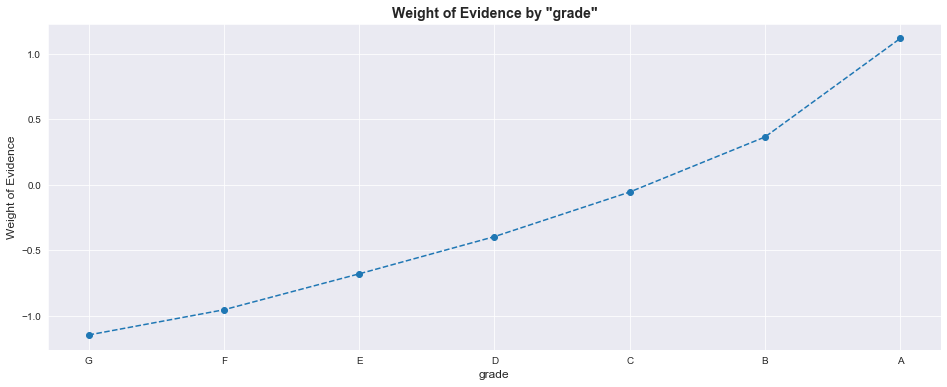

In [48]:
plot_by_woe(Woe_IV_discrete(df_inputs_prepr, 'grade', df_targets_prepr),0)

grade:G as reference category

### `home_ownership`

In [49]:
df_WoE_IV_Home

home_ownership   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0          OTHER     182   0.791209  0.208791    0.039032     144.0     38.0   
1           NONE      50   0.840000  0.160000    0.010723      42.0      8.0   
2           RENT  188473   0.873897  0.126103   40.420129  164706.0  23767.0   
3            OWN   41704   0.891737  0.108263    8.943886   37189.0   4515.0   
4       MORTGAGE  235875   0.904017  0.095983   50.586015  213235.0  22640.0   
5            ANY       1   1.000000  0.000000    0.000214       1.0      0.0   

   prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0     0.034672    0.074557 -0.765617  0.000305     inf  
1     0.010113    0.015696 -0.439616  0.000025     inf  
2    39.657900   46.631220 -0.161980  0.011295     inf  
3     8.954365    8.858499  0.010764  0.000010     inf  
4    51.342709   44.420028  0.144832  0.010026     inf  
5     0.000241    0.000000       inf       inf     inf

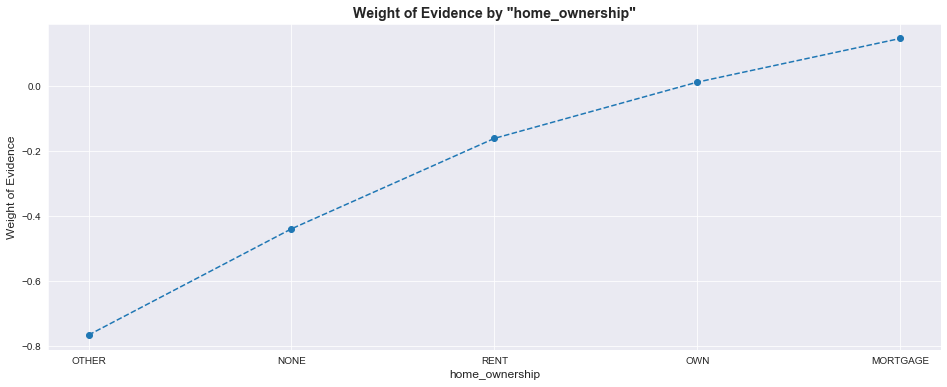

In [50]:
plot_by_woe(df_WoE_IV_Home,0)

- Categories OTHER & NONE are as associated with highest probability of deafault
- But these 2 categories had very low number of observation. the proportion is less than 0.1% each.
- WoE could not be calculated for Category ANY because there is only one observation with this home ownership status.
- It really doesn't make sense to have dummy variables for these categories so we don't want to have dummies for them but we don't want to remove them either because that would imply losing the information about these customers.
- In Such cases, we combine underrepresented categories that are similar to them.
- Combine OTHER, NONE, ANY with the riskiest category with enough number of observations wich is category RENT. 
    - RENT has similar/closer WOE to OTHER & NONE (negative value of WoE) and has good amount number of observation

In [51]:
df_inputs_prepr['home_ownership:RENT'].sum()

188473

In [52]:
sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER']]).sum()

188655

In [53]:
# Combine RENT, OTHER, NONE, ANY
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], 
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])

In [54]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'].value_counts()

0    277579
1    188706
Name: home_ownership:RENT_OTHER_NONE_ANY, dtype: int64

Reference Category : 'home_ownership:RENT_OTHER_NONE_ANY'

### `addr_state`

In [55]:
df_WoE_IV_addrState

addr_state  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0          NE     14   0.428571  0.571429    0.003002      6.0     8.0   
1          IA     14   0.785714  0.214286    0.003002     11.0     3.0   
2          NV   6519   0.862862  0.137138    1.398072   5625.0   894.0   
3          HI   2487   0.873743  0.126257    0.533365   2173.0   314.0   
4          FL  31637   0.874640  0.125360    6.784906  27671.0  3966.0   
5          AL   5853   0.876474  0.123526    1.255241   5130.0   723.0   
6          NY  40242   0.883182  0.116818    8.630344  35541.0  4701.0   
7          LA   5489   0.883403  0.116597    1.177177   4849.0   640.0   
8          NM   2588   0.884467  0.115533    0.555025   2289.0   299.0   
9          OK   4117   0.884625  0.115375    0.882936   3642.0   475.0   
10         NC  12682   0.884876  0.115124    2.719796  11222.0  1460.0   
11         MO   7508   0.884923  0.115077    1.610174   6644.0   864.0   
12         MD  10974   0.885274  0.114726    2.353496   9715.0  1259.0   
13         NJ  18061   0.885665  0.114335    3.873382  15996.0  2065.0   
14         VA  14222   0.886092  0.113908    3.050066  12602.0  1620.0   
15         CA  71450   0.886396  0.113604   15.323247  63333.0  8117.0   
16         AZ  10712   0.888350  0.111650    2.297307   9516.0  1196.0   
17         MI  11549   0.888735  0.111265    2.476811  10264.0  1285.0   
18         UT   3428   0.888856  0.111144    0.735173   3047.0   381.0   
19         TN   5984   0.888870  0.111130    1.283335   5319.0   665.0   
20         AR   3488   0.889335  0.110665    0.748040   3102.0   386.0   
21         PA  16424   0.889978  0.110022    3.522309  14617.0  1807.0   
22         RI   2050   0.890732  0.109268    0.439645   1826.0   224.0   
23         OH  15237   0.891842  0.108158    3.267744  13589.0  1648.0   
24         KY   4438   0.891843  0.108157    0.951778   3958.0   480.0   
25         DE   1272   0.892296  0.107704    0.272795   1135.0   137.0   
26         MN   8158   0.892498  0.107502    1.749574   7281.0   877.0   
27         SD    980   0.892857  0.107143    0.210172    875.0   105.0   
28         MA  11072   0.893605  0.106395    2.374513   9894.0  1178.0   
29         IN   6525   0.894100  0.105900    1.399359   5834.0   691.0   
30         GA  14975   0.896361  0.103639    3.211555  13423.0  1552.0   
31         WA  10517   0.897689  0.102311    2.255488   9441.0  1076.0   
32         WI   5911   0.899171  0.100829    1.267680   5315.0   596.0   
33         OR   5949   0.899479  0.100521    1.275829   5351.0   598.0   
34         TX  36439   0.904251  0.095749    7.814748  32950.0  3489.0   
35         IL  18612   0.905652  0.094348    3.991550  16856.0  1756.0   
36         CT   7204   0.906302  0.093698    1.544978   6529.0   675.0   
37         MT   1396   0.906877  0.093123    0.299388   1266.0   130.0   
38         CO   9739   0.908615  0.091385    2.088637   8849.0   890.0   
39         SC   5583   0.908651  0.091349    1.197336   5073.0   510.0   
40         KS   4190   0.910501  0.089499    0.898592   3815.0   375.0   
41         VT    905   0.912707  0.087293    0.194087    826.0    79.0   
42         AK   1251   0.912870  0.087130    0.268291   1142.0   109.0   
43         MS   1226   0.914356  0.085644    0.262929   1121.0   105.0   
44         ID     12   0.916667  0.083333    0.002574     11.0     1.0   
45         NH   2232   0.917115  0.082885    0.478677   2047.0   185.0   
46         WV   2412   0.919569  0.080431    0.517280   2218.0   194.0   
47         WY   1128   0.926418  0.073582    0.241912   1045.0    83.0   
48         DC   1426   0.931978  0.068022    0.305822   1329.0    97.0   
49         ME      4   1.000000  0.000000    0.000858      4.0     0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0      0.001445    0.015696 -2.385526  3.399719e-04     inf  
1      0.002649    0.005886 -0.798561  2.585315e-05     inf  
2      1.354387    1.754042 -0.258574  1.0

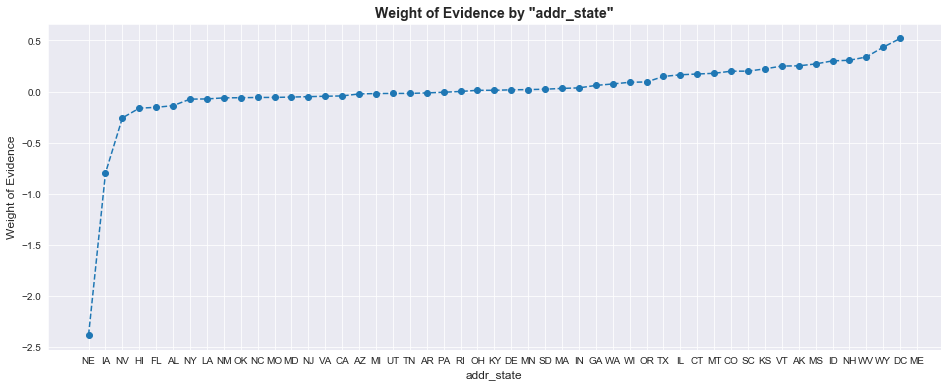

In [56]:
plot_by_woe(df_WoE_IV_addrState,0)

There are no borrowers in our dataset from one of the sates : North Dakota (ND)

In [57]:
# Create categories for ND just incase there are some borrower in the future
# We dont have any info/data for ND, thus we assume it as high risk. finally impute as default(0)
if 'addr_state:ND' in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [58]:
df_inputs_prepr['addr_state:ND']

0         0
1         0
2         0
3         0
4         0
         ..
466280    0
466281    0
466282    0
466283    0
466284    0
Name: addr_state:ND, Length: 466285, dtype: int64

- NE & IA have extreme low WoE & low number of observation, thus we will make combine them into same category/dummy
- ME & ID have extrem high WoE, probably it caused by very low number of observation, thus we will keep it mind later.

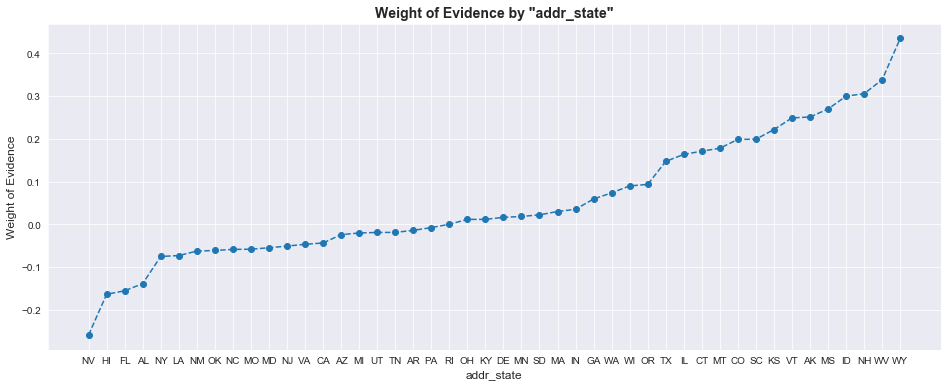

In [59]:
#lets see the plot without NE, IA, ME, ID
plot_by_woe(df_WoE_IV_addrState.iloc[2:-2, : ])

- Now we get different perspective from this plot(without NE, IA, ME, ID) compare to plot before.
- NV has lowest WoE
- FL, HI, AL have low & quiet similar WoE --> probably we'll make it on 1 category (dummy)

- Remember NE & IA have low WoE also & have low number of observation
- we have no Information about ND. in term of risk management, we consider ND as a high risk (low WoE-->higher probability to deafult)



<b>In Conclusion we'll keep 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' in one category/dummy</b>

- 'WV' 'NH' 'WY' 'DC' have high & quiet similar WoE
- Remember ME, ID have very high WoE & low number of Observation

<b>In Conclusion we'll keep 'WV' 'NH' 'WY' 'DC' 'ME 'ID' in one category/dummy</b>

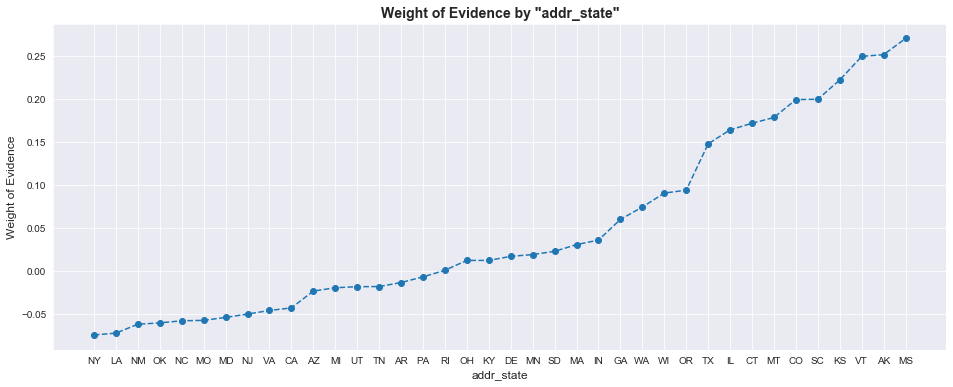

In [60]:
#lets see the plot without 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL' &  'WV' 'NH' 'WY' 'DC' 'ME 'ID'
plot_by_woe(df_WoE_IV_addrState.iloc[6:-6, : ])

- 'NM' to 'CA' have low WoE. it seems that we can make it into 1 category. but before we do that. lets see the number of observation for each of it
- 'NY' & 'CA' stands out with high number of borrowers / high number of observation. thus we'll leave it by itself

<b> So the group of category should be:
    1. 'NM' 'VA'
    2. 'NY'
    3. 'OK 'TN' 'MO' 'LA' 'MD' 'NC'
    4. 'CA'
</b> 


- For the next group / category we'll do the same step as before

<b> So the group of category should be:
    1. 'UT' 'KY' 'AZ' 'NJ'
    2. 'AR' 'MI' 'PA' 'OH' 'MN'
    3. 'RI' 'MA' 'DE' 'SD' 'IN'
    4. 'GA' 'WA' 'OR'
    5. 'WI' 'MT'
    6. 'TX'
    7. 'IL' 'CT'
    8. 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
</b> 

In [61]:
# Group of state with LOWEST WoE / Highest Probability to Default 
# Reference Category
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

# Group of state with HIGHEST WoE / Lowest Probability to Default 
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

############################################################################################################################

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

Reference Category 'addr_state:ND_NE_IA_NV_FL_HI_AL'

### `verification_status`

In [62]:
df_WoE_IV_VerifStat

verification_status   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0            Verified  168055   0.872631  0.127369   36.041262  146650.0   
1     Source Verified  149993   0.895882  0.104118   32.167666  134376.0   
2        Not Verified  148237   0.905921  0.094079   31.791072  134291.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  21405.0    35.310377   41.996939 -0.173420  0.011596  0.020831  
1  15617.0    32.355044   30.640794  0.054438  0.000933  0.020831  
2  13946.0    32.334578   27.362267  0.166972  0.008302  0.020831

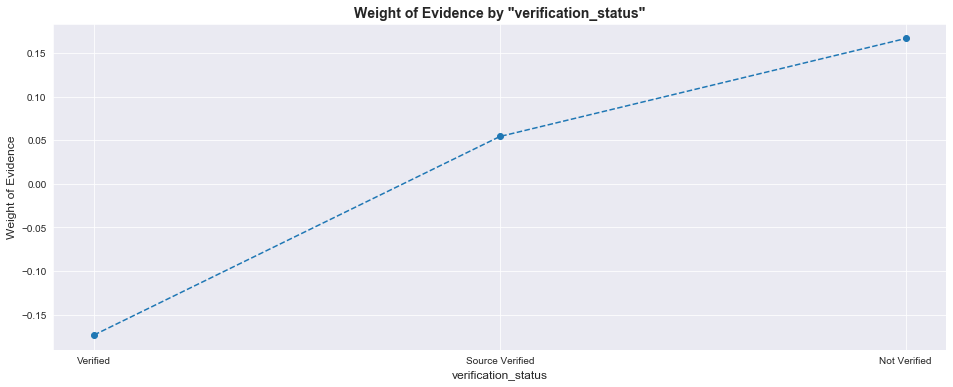

In [63]:
plot_by_woe(df_WoE_IV_VerifStat,0)

verification_status:Verified = Reference Category

###  `purpose`

In [64]:
df_WoE_IV_purpose

purpose   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0       small_business    7013   0.784258  0.215742    1.504016    5500.0   
1          educational     422   0.791469  0.208531    0.090503     334.0   
2     renewable_energy     351   0.846154  0.153846    0.075276     297.0   
3               moving    2994   0.847361  0.152639    0.642097    2537.0   
4                house    2269   0.859850  0.140150    0.486612    1951.0   
5                other   23690   0.862009  0.137991    5.080584   20421.0   
6              medical    4602   0.866145  0.133855    0.986950    3986.0   
7              wedding    2343   0.878361  0.121639    0.502482    2058.0   
8             vacation    2487   0.882187  0.117813    0.533365    2194.0   
9   debt_consolidation  274195   0.886690  0.113310   58.804165  243126.0   
10    home_improvement   26537   0.901835  0.098165    5.691155   23932.0   
11      major_purchase    9828   0.904457  0.095543    2.107724    8889.0   
12                 car    5397   0.910876  0.089124    1.157447    4916.0   
13         credit_card  104157   0.913774  0.086226   22.337626   95176.0   

      n_bad  prop_n_good  prop_n_bad       WoE        IV   sum_IV  
0    1513.0     1.324290    2.968529 -0.807190  0.013272  0.03698  
1      88.0     0.080420    0.172657 -0.764040  0.000705  0.03698  
2      54.0     0.071512    0.105949 -0.393096  0.000135  0.03698  
3     457.0     0.610859    0.896641 -0.383790  0.001097  0.03698  
4     318.0     0.469762    0.623921 -0.283798  0.000438  0.03698  
5    3269.0     4.916967    6.413828 -0.265764  0.003978  0.03698  
6     616.0     0.959749    1.208601 -0.230548  0.000574  0.03698  
7     285.0     0.495525    0.559174 -0.120843  0.000077  0.03698  
8     293.0     0.528271    0.574871 -0.084535  0.000039  0.03698  
9   31069.0    58.539862   60.957856 -0.040475  0.000979  0.03698  
10   2605.0     5.762345    5.111050  0.119940  0.000781  0.03698  
11    939.0     2.140293    1.842332  0.149910  0.000447  0.03698  
12    481.0     1.183674    0.943729  0.226539  0.000544  0.03698  
13   8981.0    22.916471   17.620860  0.262772  0.013915  0.03698

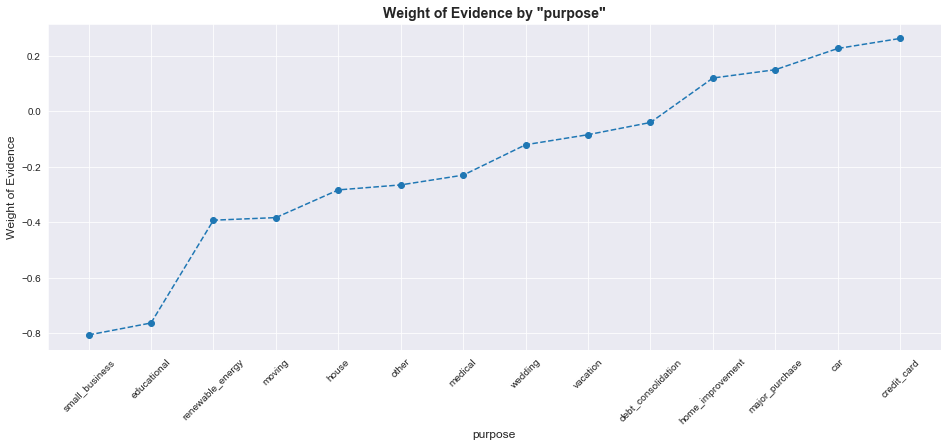

In [65]:
plot_by_woe(df_WoE_IV_purpose, 45)

- We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.

- We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.

- We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.

- We leave 'debt_consolidtion' in a separate category.

- We leave 'credit_card' in a separate category.

- **'educ__sm_b__wedd__ren_en__mov__house' will be the reference category**.

In [66]:
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], 
                                                                       df_inputs_prepr['purpose:small_business'],
                                                                       df_inputs_prepr['purpose:wedding'], 
                                                                       df_inputs_prepr['purpose:renewable_energy'],
                                                                       df_inputs_prepr['purpose:moving'], 
                                                                       df_inputs_prepr['purpose:house']])

df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], 
                                                     df_inputs_prepr['purpose:medical'],
                                                     df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], 
                                                              df_inputs_prepr['purpose:car'],
                                                              df_inputs_prepr['purpose:home_improvement']])

### `initial_list_status`

In [67]:
df_WoE_IV_initListStat

initial_list_status   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0                   f  303005   0.879692  0.120308   64.982789  266551.0   
1                   w  163280   0.911110  0.088890   35.017211  148766.0   

     n_bad  prop_n_good  prop_n_bad       WoE        IV    sum_IV  
0  36454.0    64.180132   71.523309 -0.108330  0.007955  0.024801  
1  14514.0    35.819868   28.476691  0.229417  0.016846  0.024801

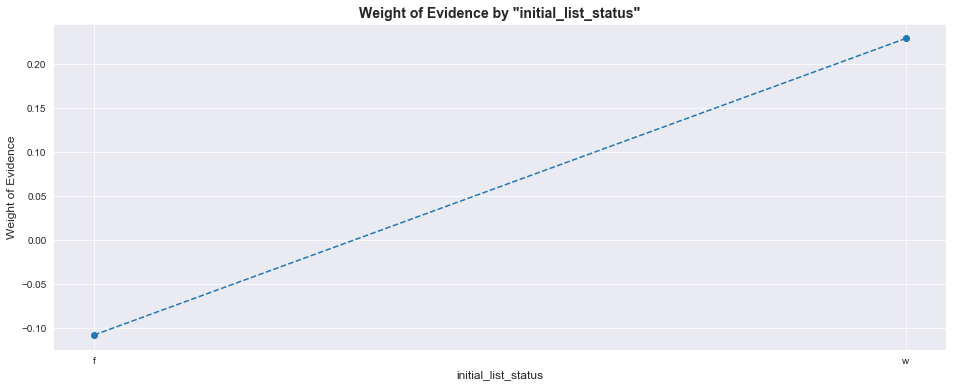

In [68]:
plot_by_woe(df_WoE_IV_initListStat,0)

initial_list_status:f = Reference Category

## Preprocessing Continuous Variables

### Automating Calculations and Visualizing Results

In [69]:
def Woe_IV_continuous (df_predictor, feature_name, df_target):
    df = pd.concat([df_predictor[feature_name], df_target],axis=1)
    df = pd.merge(df.groupby(feature_name, as_index=False).count(), 
               df.groupby(feature_name, as_index=False).mean(), on=feature_name)
    df.columns = [feature_name, 'n_obs', 'prop_good']
    
    df['prop_bad'] = 1 - df['prop_good']
    
    #prop_n_obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()*100
    
    #n_good & n_bad
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    
    #prop_n_good & prop_n_bad
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()*100
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()*100
    
    #WoE
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
#     df = df.sort_values('WoE')
#     df = df.reset_index(drop=True)
    
    #IV
    df['IV'] = df['WoE'] * (df['prop_n_good'] - df['prop_n_bad'])/100
    df['sum_IV'] = df['IV'].sum()
    

    
    return df

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

### `term_int`

In [70]:
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [71]:
df_Con_Woe_IV_term = Woe_IV_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_Con_Woe_IV_term

term_int   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0        36  337953   0.902915  0.097085   72.477776  305143.0  32810.0   
1        60  128332   0.858508  0.141492   27.522224  110174.0  18158.0   

   prop_n_good  prop_n_bad       WoE        IV   sum_IV  
0    73.472312   64.373725  0.132203  0.012029  0.03886  
1    26.527688   35.626275 -0.294894  0.026831  0.03886

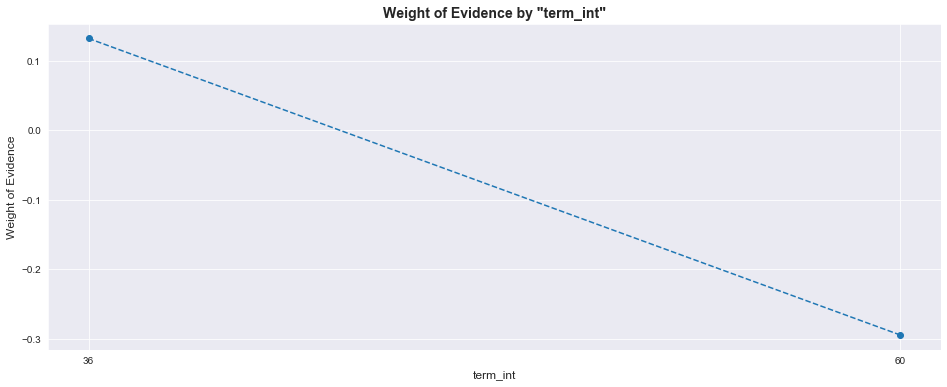

In [72]:
plot_by_woe(df_Con_Woe_IV_term,0)

In [73]:
#create dummy
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### `emp_length_int`

In [74]:
df_inputs_prepr['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [75]:
df_Con_Woe_IV_emp_len = Woe_IV_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_Con_Woe_IV_emp_len

emp_length_int   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0              0.0   57273   0.876015  0.123985   12.282831   50172.0   
1              1.0   29622   0.888124  0.111876    6.352767   26308.0   
2              2.0   41373   0.890242  0.109758    8.872900   36832.0   
3              3.0   36596   0.890480  0.109520    7.848419   32588.0   
4              4.0   28023   0.890411  0.109589    6.009844   24952.0   
5              5.0   30774   0.885033  0.114967    6.599826   27236.0   
6              6.0   26112   0.882889  0.117111    5.600009   23054.0   
7              7.0   26180   0.888655  0.111345    5.614592   23265.0   
8              8.0   22395   0.889931  0.110069    4.802857   19930.0   
9              9.0   17888   0.887914  0.112086    3.836280   15883.0   
10            10.0  150049   0.900353  0.099647   32.179676  135097.0   

      n_bad  prop_n_good  prop_n_bad       WoE            IV    sum_IV  
0    7101.0    12.080411   13.932271 -0.142623  2.641172e-03  0.006611  
1    3314.0     6.334439    6.502119 -0.026127  4.380978e-05  0.006611  
2    4541.0     8.868407    8.909512 -0.004624  1.900841e-06  0.006611  
3    4008.0     7.846537    7.863758 -0.002192  3.775463e-07  0.006611  
4    3071.0     6.007941    6.025349 -0.002893  5.036855e-07  0.006611  
5    3538.0     6.557882    6.941610 -0.056866  2.182111e-04  0.006611  
6    3058.0     5.550941    5.999843 -0.077766  3.490931e-04  0.006611  
7    2915.0     5.601745    5.719275 -0.020764  2.440366e-05  0.006611  
8    2465.0     4.798744    4.836368 -0.007810  2.938335e-06  0.006611  
9    2005.0     3.824308    3.933841 -0.028239  3.093085e-05  0.006611  
10  14952.0    32.528647   29.336054  0.103304  3.298072e-03  0.006611

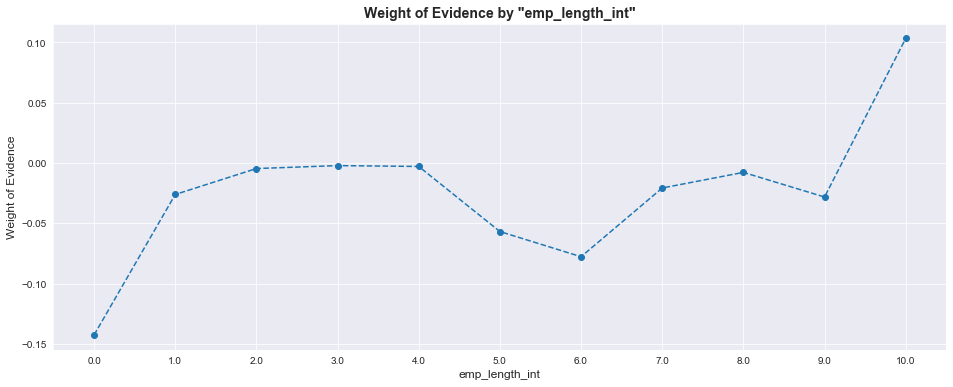

In [76]:
plot_by_woe(df_Con_Woe_IV_emp_len)

We'll do coarse classing like we did it before on `addr_state` variable.

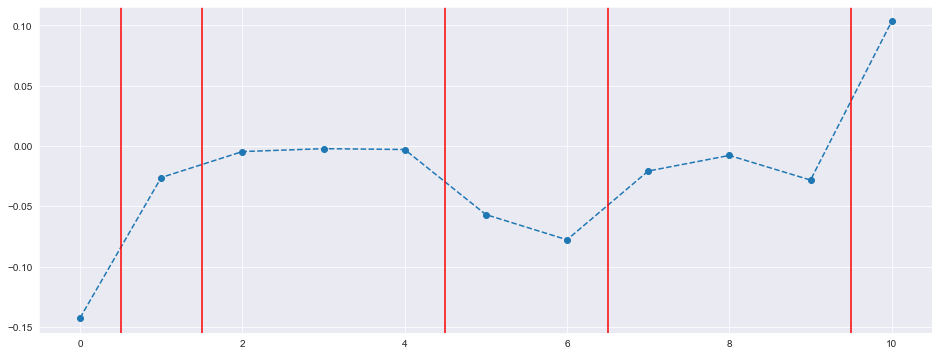

In [77]:
data = df_Con_Woe_IV_emp_len
plt.figure(figsize=(16,6))
plt.plot(data['emp_length_int'], data['WoE'], '--o')
plt.axvline([0.5], color='red') # 0
plt.axvline([1.5], color='red') # 1
plt.axvline([4.5], color='red') # 2-4
plt.axvline([6.5], color='red') # 5-6
plt.axvline([9.5], color='red') # 7-9
# plt.axvline([10.3], color='red') # 10
plt.show()

emp_length:0 = Reference Category

In [78]:
# Create dummy
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [79]:
len(df_inputs_prepr.columns)

230

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

### `mths_since_issue_d`

In [80]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 124., 125., 126.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.])

In [81]:
df_inputs_prepr['mths_since_issue_d'].nunique()

91

In [82]:
df_inputs_prepr['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [83]:
# FINE CLASSING: using the 'cut' method, we split the variable into 50 categories by its values
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [84]:
df_inputs_prepr['mths_since_issue_d_factor']
# The value of interval
# e.g : 43.2, 45.0 --> Greater than 43.2, Less than or Equal to 45.0

0         (70.2, 72.0]
1         (70.2, 72.0]
2         (70.2, 72.0]
3         (70.2, 72.0]
4         (70.2, 72.0]
              ...     
466280    (46.8, 48.6]
466281    (46.8, 48.6]
466282    (46.8, 48.6]
466283    (46.8, 48.6]
466284    (46.8, 48.6]
Name: mths_since_issue_d_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [85]:
df_Con_Woe_IV_Issue_date = Woe_IV_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_Con_Woe_IV_Issue_date

mths_since_issue_d_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0              (35.91, 37.8]  35361   0.942960  0.057040    7.583559  33344.0   
1               (37.8, 39.6]  49388   0.928809  0.071191   10.591805  45872.0   
2               (39.6, 41.4]  48120   0.917810  0.082190   10.319869  44165.0   
3               (41.4, 43.2]  36278   0.908705  0.091295    7.780220  32966.0   
4               (43.2, 45.0]  35584   0.902007  0.097993    7.631384  32097.0   
5               (45.0, 46.8]  15269   0.898487  0.101513    3.274607  13719.0   
6               (46.8, 48.6]  30648   0.897155  0.102845    6.572804  27496.0   
7               (48.6, 50.4]  28790   0.887843  0.112157    6.174335  25561.0   
8               (50.4, 52.2]  25661   0.880207  0.119793    5.503287  22587.0   
9               (52.2, 54.0]  22809   0.868298  0.131702    4.891644  19805.0   
10              (54.0, 55.8]  10350   0.858647  0.141353    2.219673   8887.0   
11              (55.8, 57.6]  17692   0.862706  0.137294    3.794246  15263.0   
12              (57.6, 59.4]  14433   0.857895  0.142105    3.095317  12382.0   
13              (59.4, 61.2]  12448   0.851783  0.148217    2.669612  10603.0   
14              (61.2, 63.0]  12350   0.851903  0.148097    2.648595  10521.0   
15              (63.0, 64.8]   5419   0.842960  0.157040    1.162165   4568.0   
16              (64.8, 66.6]   8444   0.823188  0.176812    1.810910   6951.0   
17              (66.6, 68.4]   6630   0.843439  0.156561    1.421877   5592.0   
18              (68.4, 70.2]   5474   0.845269  0.154731    1.173960   4627.0   
19              (70.2, 72.0]   4869   0.825221  0.174779    1.044211   4018.0   
20              (72.0, 73.8]   2232   0.850358  0.149642    0.478677   1898.0   
21              (73.8, 75.6]   4185   0.853047  0.146953    0.897520   3570.0   
22              (75.6, 77.4]   3809   0.856393  0.143607    0.816882   3262.0   
23              (77.4, 79.2]   3539   0.842611  0.157389    0.758978   2982.0   
24              (79.2, 81.0]   3011   0.856858  0.143142    0.645742   2580.0   
25              (81.0, 82.8]   1298   0.869800  0.130200    0.278371   1129.0   
26              (82.8, 84.6]   2715   0.872192  0.127808    0.582262   2368.0   
27              (84.6, 86.4]   2456   0.851384  0.148616    0.526716   2091.0   
28              (86.4, 88.2]   2364   0.839679  0.160321    0.506986   1985.0   
29              (88.2, 90.0]   2309   0.846254  0.153746    0.495191   1954.0   
30              (90.0, 91.8]    989   0.854398  0.145602    0.212102    845.0   
31              (91.8, 93.6]   1740   0.891954  0.108046    0.373162   1552.0   
32              (93.6, 95.4]   1344   0.875744  0.124256    0.288236   1177.0   
33              (95.4, 97.2]   1320   0.872727  0.127273    0.283089   1152.0   
34              (97.2, 99.0]   1111   0.850585  0.149415    0.238266    945.0   
35             (99.0, 100.8]    446   0.887892  0.112108    0.095650    396.0   
36            (100.8, 102.6]    817   0.858017  0.141983    0.175215    701.0   
37            (102.6, 104.4]    692   0.855491  0.144509    0.148407    592.0   
38            (104.4, 106.2]    626   0.869010  0.130990    0.134253    544.0   
39            (106.2, 108.0]    522   0.844828  0.155172    0.111949    441.0   
40            (108.0, 109.8]    209   0.813397  0.186603    0.044822    170.0   
41            (109.8, 111.6]    179   0.826816  0.173184    0.038389    148.0   
42            (111.6, 113.4]    241   0.825726  0.174274    0.051685    199.0   
43            (113.4, 115.2]    239   0.803347  0.196653    0.051256    192.0   
44            (115.2, 117.0]    661   0.770045  0.229955    0.141759    509.0   
45            (117.0, 118.8]    306   0.800654  0.199346    0.065625    245.0   
46            (118.8, 120.6]    477   0.725367  0.274633    0.102298    346.0   
47            (120.6, 122.4]    217   0.686636  0.313364    0.046538    149.0   
48            (122.4, 124.2]    12

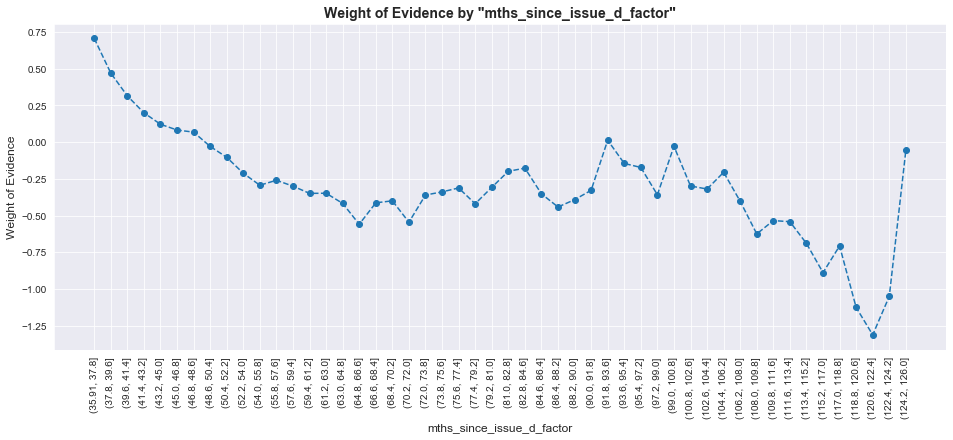

In [86]:
plot_by_woe(df_Con_Woe_IV_Issue_date,90)

First 3 Category of `mths_since_issue_d_factor` has high or distinctive WoE compare to the rest of it. Thus we'll keep it as it is and see the other category except these values.

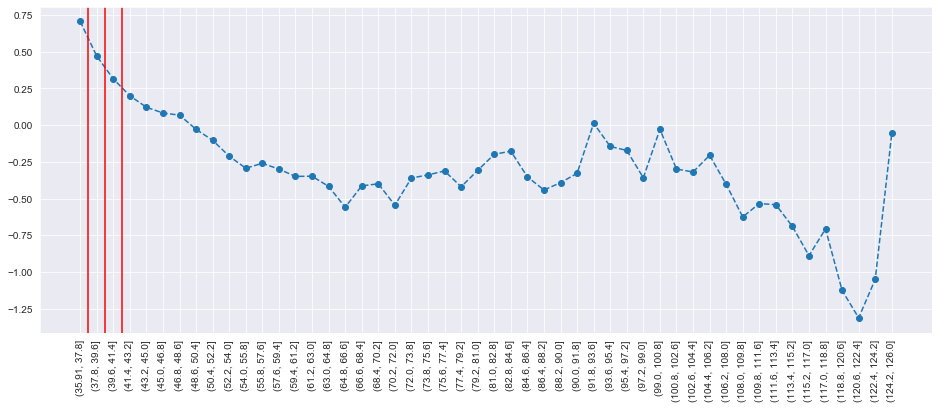

In [87]:
data = df_Con_Woe_IV_Issue_date
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([0.5], color='red')
plt.axvline([1.5], color='red')
plt.axvline([2.5], color='red')
plt.show()

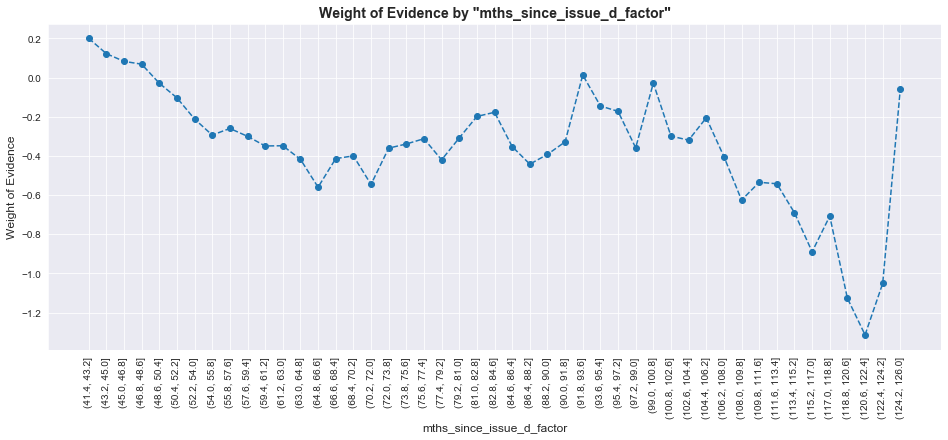

In [88]:
plot_by_woe(df_Con_Woe_IV_Issue_date.iloc[3:,:],90)

Important determinant was the number of observations that fall into a given category. If we check out the remaining categories we can notice that they contain a very small number of observations altogether.


In fact this is the reason why their weights of evidence vary a lot. So even if you have forgotten to check the number of observations that fall into each category such a plot can serve as a red flag.


Whenever you see a WoE plot that goes up and down like this (`mnths_since_issue_d_factor` > 65) we must make sure to check the number of observations in the respective categories.

OK so we know that these intervals (`mnths_since_issue_d_factor` > 65) refer to only a small portion of our data. Therefore we can create only one dummy variable for all of them. But alternatively we prefer to make (64.8-66.6) - (82.8-84.6) as one category & (84.6-86.4)-(124.2-126.0) as another one.

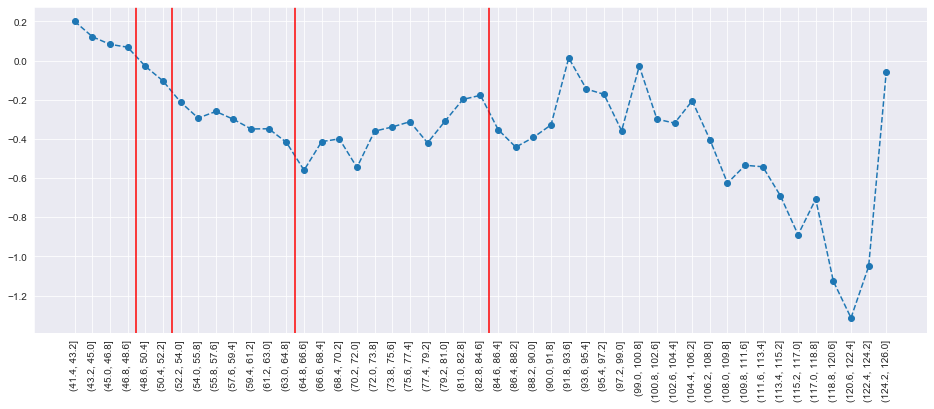

In [89]:
data = df_Con_Woe_IV_Issue_date.iloc[3:,:]
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_issue_d_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([3.5], color='red')
plt.axvline([5.5], color='red')
plt.axvline([12.5], color='red')
plt.axvline([23.5], color='red')
plt.show()

In [90]:
# We create the following categories:
# < 38
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
#38 - 39
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
#40 - 41
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)


#42 - 48
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
#49 - 52
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
#53 - 64
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
#65 - 84
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
#> 84
df_inputs_prepr['mths_since_issue_d:>84'] = np.where((df_inputs_prepr['mths_since_issue_d']>84), 1, 0)
# df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

## `int_rate`

In [91]:
df_inputs_prepr['int_rate'].unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

In [92]:
df_inputs_prepr['int_rate'].nunique()

506

In [93]:
#FINE CLASSING
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [94]:
df_inputs_prepr['int_rate_factor']

0         (10.374, 10.786]
1         (14.914, 15.327]
2          (15.74, 16.153]
3         (13.263, 13.676]
4          (12.438, 12.85]
                ...       
466280    (14.089, 14.502]
466281    (19.868, 20.281]
466282    (16.978, 17.391]
466283       (7.897, 8.31]
466284    (19.042, 19.455]
Name: int_rate_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [95]:
df_Con_Woe_IV_int_rate = Woe_IV_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_Con_Woe_IV_int_rate

int_rate_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0     (5.399, 5.833]    983   0.963377  0.036623    0.210815    947.0    36.0   
1     (5.833, 6.246]  10545   0.980275  0.019725    2.261492  10337.0   208.0   
2     (6.246, 6.658]   9800   0.971633  0.028367    2.101719   9522.0   278.0   
3     (6.658, 7.071]   2293   0.968600  0.031400    0.491759   2221.0    72.0   
4     (7.071, 7.484]   3947   0.977451  0.022549    0.846478   3858.0    89.0   
5     (7.484, 7.897]  15826   0.962972  0.037028    3.394062  15240.0   586.0   
6      (7.897, 8.31]  12116   0.949653  0.050347    2.598411  11506.0   610.0   
7      (8.31, 8.722]   8274   0.965313  0.034687    1.774451   7987.0   287.0   
8     (8.722, 9.135]  11923   0.938354  0.061646    2.557020  11188.0   735.0   
9     (9.135, 9.548]   8271   0.966389  0.033611    1.773808   7993.0   278.0   
10    (9.548, 9.961]   9469   0.931777  0.068223    2.030732   8823.0   646.0   
11   (9.961, 10.374]  13707   0.934194  0.065806    2.939618  12805.0   902.0   
12  (10.374, 10.786]   7247   0.914447  0.085553    1.554200   6627.0   620.0   
13  (10.786, 11.199]  22315   0.931167  0.068833    4.785700  20779.0  1536.0   
14  (11.199, 11.612]   6089   0.918377  0.081623    1.305854   5592.0   497.0   
15  (11.612, 12.025]  19334   0.932813  0.067187    4.146391  18035.0  1299.0   
16  (12.025, 12.438]  15413   0.895153  0.104847    3.305489  13797.0  1616.0   
17   (12.438, 12.85]  13819   0.922353  0.077647    2.963638  12746.0  1073.0   
18   (12.85, 13.263]  26769   0.903172  0.096828    5.740910  24177.0  2592.0   
19  (13.263, 13.676]  19198   0.905771  0.094229    4.117224  17389.0  1809.0   
20  (13.676, 14.089]  13683   0.896441  0.103559    2.934471  12266.0  1417.0   
21  (14.089, 14.502]  29196   0.887587  0.112413    6.261407  25914.0  3282.0   
22  (14.502, 14.914]   5520   0.863949  0.136051    1.183825   4769.0   751.0   
23  (14.914, 15.327]  23743   0.881902  0.118098    5.091950  20939.0  2804.0   
24   (15.327, 15.74]  15473   0.887352  0.112648    3.318357  13730.0  1743.0   
25   (15.74, 16.153]   9346   0.838648  0.161352    2.004354   7838.0  1508.0   
26  (16.153, 16.566]  16221   0.857469  0.142531    3.478774  13909.0  2312.0   
27  (16.566, 16.978]   5272   0.844461  0.155539    1.130639   4452.0   820.0   
28  (16.978, 17.391]  14239   0.852448  0.147552    3.053712  12138.0  2101.0   
29  (17.391, 17.804]  15280   0.839071  0.160929    3.276966  12821.0  2459.0   
30  (17.804, 18.217]   1592   0.825377  0.174623    0.341422   1314.0   278.0   
31   (18.217, 18.63]  13765   0.833854  0.166146    2.952057  11478.0  2287.0   
32   (18.63, 19.042]   8643   0.819276  0.180724    1.853587   7081.0  1562.0   
33  (19.042, 19.455]   5560   0.799820  0.200180    1.192404   4447.0  1113.0   
34  (19.455, 19.868]   8443   0.822220  0.177780    1.810695   6942.0  1501.0   
35  (19.868, 20.281]   6143   0.835748  0.164252    1.317435   5134.0  1009.0   
36  (20.281, 20.694]   4026   0.799056  0.200944    0.863420   3217.0   809.0   
37  (20.694, 21.106]   4972   0.798069  0.201931    1.066301   3968.0  1004.0   
38  (21.106, 21.519]   3430   0.775219  0.224781    0.735602   2659.0   771.0   
39  (21.519, 21.932]   1211   0.767960  0.232040    0.259712    930.0   281.0   
40  (21.932, 22.345]   4308   0.791318  0.208682    0.923898   3409.0   899.0   
41  (22.345, 22.758]   2837   0.758195  0.241805    0.608426   2151.0   686.0   
42   (22.758, 23.17]   1910   0.756021  0.243979    0.409621   1444.0   466.0   
43   (23.17, 23.583]   3307   0.781978  0.218022    0.709223   2586.0   721.0   
44  (23.583, 23.996]   1981   0.729430  0.270570    0.424847   1445.0   536.0   
45  (23.996, 24.409]   1848   0.781926  0.218074    0.396324   1445.0   403.0   
46  (24.409, 24.822]   2100   0.767619  0.232381    0.450368   1612.0   488.0   
47  (24.822, 25.234]   1666   0.775510  0.224490    0.357292   1292.0   374.0   
48  (25.234, 25.647]    972   0.7407

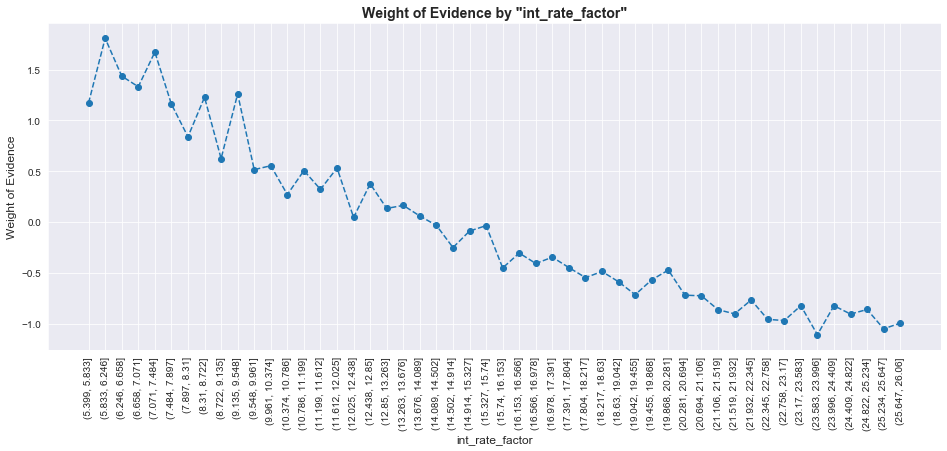

In [96]:
plot_by_woe(df_Con_Woe_IV_int_rate,90)

- The Graph show Monotonic Relationship. 
    - A monotonic relationship is a relationship that does one of the following: 
            (1) as the value of one variable increases, so does the value of the other variable; or 
            (2) as the value of one variable increases, the other variable value decreases.
- The Greate the Interest Rate the Lower the Weight of evidence (Monotonic relationship type 2) = <b>the higher the interest rate give higher probability of Deafault (Monotonic relationship type 2)</b>

1.  The first 10 interval of interest rate have relativly high WoE, but have low Number of Observation. Bundled them in  one category / dummy (5.399 - 9.548) **Greter than 5.399 and Less tha or Equal to 9.548**
2. interval betwwen (9.548 - 12.025) have realativly same WoE,  Bundled them in  one category / dummy.
3. 12.025 - 15.74
4. 15.74 - 20.281
5. value grater than 20.281

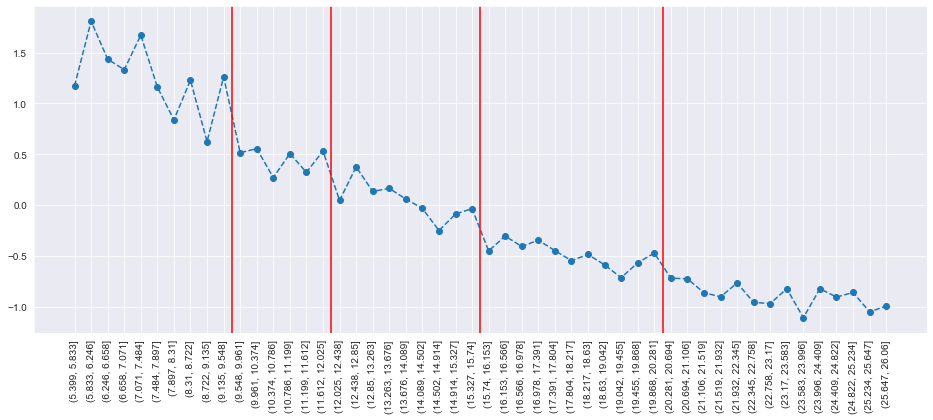

In [97]:
data = df_Con_Woe_IV_int_rate
plt.figure(figsize=(16,6))
plt.plot(np.array(data['int_rate_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([9.5], color='red')
plt.axvline([15.5], color='red')
plt.axvline([24.5], color='red')
plt.axvline([35.5], color='red')
plt.show()

In [98]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

## `funded_amnt`

In [99]:
df_inputs_prepr['funded_amnt'].unique()

array([ 5000,  2500,  2400, ..., 27775, 33175, 31725], dtype=int64)

In [100]:
df_inputs_prepr['funded_amnt'].nunique()

1354

In [101]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

In [102]:
df_inputs_prepr['funded_amnt_factor']

0           (4640.0, 5330.0]
1           (1880.0, 2570.0]
2           (1880.0, 2570.0]
3          (9470.0, 10160.0]
4           (2570.0, 3260.0]
                 ...        
466280    (17750.0, 18440.0]
466281    (21890.0, 22580.0]
466282    (20510.0, 21200.0]
466283      (1880.0, 2570.0]
466284     (9470.0, 10160.0]
Name: funded_amnt_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [103]:
df_Con_Woe_IV_funded_amnt= Woe_IV_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_Con_Woe_IV_funded_amnt

funded_amnt_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0      (465.5, 1190.0]   1543   0.900194  0.099806    0.330913   1389.0   
1     (1190.0, 1880.0]   3828   0.902299  0.097701    0.820957   3454.0   
2     (1880.0, 2570.0]   7531   0.895100  0.104900    1.615107   6741.0   
3     (2570.0, 3260.0]   9065   0.890017  0.109983    1.944090   8068.0   
4     (3260.0, 3950.0]   5996   0.891594  0.108406    1.285909   5346.0   
5     (3950.0, 4640.0]  11321   0.889321  0.110679    2.427914  10068.0   
6     (4640.0, 5330.0]  19860   0.893353  0.106647    4.259198  17742.0   
7     (5330.0, 6020.0]  21422   0.906171  0.093829    4.594186  19412.0   
8     (6020.0, 6710.0]   8632   0.886469  0.113531    1.851228   7652.0   
9     (6710.0, 7400.0]  14686   0.897113  0.102887    3.149576  13175.0   
10    (7400.0, 8090.0]  21958   0.896940  0.103060    4.709137  19695.0   
11    (8090.0, 8780.0]   7933   0.881760  0.118240    1.701320   6995.0   
12    (8780.0, 9470.0]  11488   0.882051  0.117949    2.463729  10133.0   
13   (9470.0, 10160.0]  41962   0.894381  0.105619    8.999217  37530.0   
14  (10160.0, 10850.0]   8397   0.872812  0.127188    1.800830   7329.0   
15  (10850.0, 11540.0]  10650   0.882347  0.117653    2.284011   9397.0   
16  (11540.0, 12230.0]  29273   0.903221  0.096779    6.277920  26440.0   
17  (12230.0, 12920.0]   6030   0.875124  0.124876    1.293201   5277.0   
18  (12920.0, 13610.0]   9107   0.895685  0.104315    1.953097   8157.0   
19  (13610.0, 14300.0]  10210   0.894123  0.105877    2.189648   9129.0   
20  (14300.0, 14990.0]   6438   0.877291  0.122709    1.380701   5648.0   
21  (14990.0, 15680.0]  27198   0.900066  0.099934    5.832913  24480.0   
22  (15680.0, 16370.0]  14708   0.883805  0.116195    3.154294  12999.0   
23  (16370.0, 17060.0]   8163   0.877374  0.122626    1.750646   7162.0   
24  (17060.0, 17750.0]   4343   0.863228  0.136772    0.931405   3749.0   
25  (17750.0, 18440.0]  14339   0.885208  0.114792    3.075158  12693.0   
26  (18440.0, 19130.0]   4908   0.866952  0.133048    1.052575   4255.0   
27  (19130.0, 19820.0]   5061   0.861095  0.138905    1.085388   4358.0   
28  (19820.0, 20510.0]  25342   0.898548  0.101452    5.434874  22771.0   
29  (20510.0, 21200.0]   8347   0.896130  0.103870    1.790107   7480.0   
30  (21200.0, 21890.0]   2557   0.848260  0.151740    0.548377   2169.0   
31  (21890.0, 22580.0]   5142   0.888370  0.111630    1.102759   4568.0   
32  (22580.0, 23270.0]   3078   0.886615  0.113385    0.660111   2729.0   
33  (23270.0, 23960.0]   2322   0.843239  0.156761    0.497979   1958.0   
34  (23960.0, 24650.0]  12327   0.903058  0.096942    2.643662  11132.0   
35  (24650.0, 25340.0]  12574   0.892477  0.107523    2.696634  11222.0   
36  (25340.0, 26030.0]   2319   0.865028  0.134972    0.497335   2006.0   
37  (26030.0, 26720.0]   1551   0.833011  0.166989    0.332629   1292.0   
38  (26720.0, 27410.0]   1920   0.872917  0.127083    0.411765   1676.0   
39  (27410.0, 28100.0]   8061   0.904851  0.095149    1.728771   7294.0   
40  (28100.0, 28790.0]    999   0.854855  0.145145    0.214247    854.0   
41  (28790.0, 29480.0]   1462   0.862517  0.137483    0.313542   1261.0   
42  (29480.0, 30170.0]   9070   0.883682  0.116318    1.945162   8015.0   
43  (30170.0, 30860.0]    700   0.825714  0.174286    0.150123    578.0   
44  (30860.0, 31550.0]   1102   0.872958  0.127042    0.236336    962.0   
45  (31550.0, 32240.0]   1693   0.883048  0.116952    0.363083   1495.0   
46  (32240.0, 32930.0]    770   0.876623  0.123377    0.165135    675.0   
47  (32930.0, 33620.0]   1365   0.896703  0.103297    0.292739   1224.0   
48  (33620.0, 34310.0]    634   0.891167  0.108833    0.135968    565.0   
49  (34310.0, 35000.0]  16900   0.882722  0.117278    3.624393  14918.0   

     n_bad  prop_n_good  prop_n_bad       WoE            IV    sum_IV  
0    154.0     0.334443    0.302150  0.101543  3.279112e-05  0.014153  
1    374.0     0.831654    0.73379

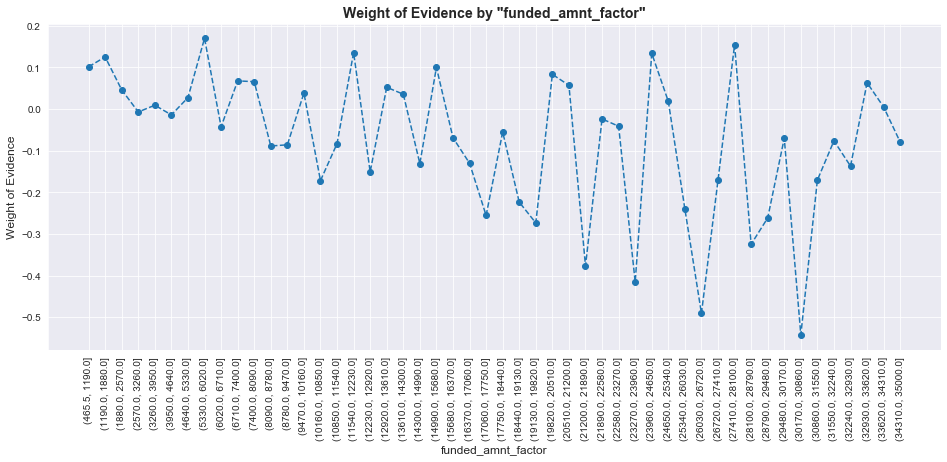

In [104]:
plot_by_woe(df_Con_Woe_IV_funded_amnt,90)

1. if we look at the graph above the pattern is quite straight horizontal. there seems to be no association between 'funded_amnt' and WoE
2. if we look at the Information Value of `funded_amnt` it has very low value (0.014139). this point is confirm our first point. and it lead us to conclusion that `funded_amnt` has no association to the independent variable (`good_bad`)
3. according to our points above, we leave the `funded_amnt` as it is and not to proceed it into coarse classing & crate dummy
4. probably we'll not using this variable in our PD Model

### `mths_since_earliest_cr_line`

In [105]:
df_inputs_prepr['mths_since_earliest_cr_line'].unique()

array([395., 224., 193., 262., 263., 157., 149., 131., 164., 159., 239.,
       338., 173., 319., 123., 230., 292., 170., 203., 241., 418., 389.,
       176., 198., 190., 400., 133., 360., 433., 250., 152., 122., 204.,
       128., 192., 179., 285., 231., 162., 265., 221., 270., 303., 191.,
       308., 134., 211., 228., 156., 206., 187., 139., 185., 137., 247.,
       146., 272., 182., 215., 212., 276., 147., 396., 216., 169., 342.,
       174., 254., 175., 186., 126., 252., 406., 183., 383., 235., 251.,
       150., 334., 165., 269., 280., 306., 249., 140., 332., 220., 207.,
       202., 348., 226., 312., 208., 158., 160., 154., 145., 205., 127.,
       323., 210., 136., 180., 294., 138., 166., 324., 213., 274., 197.,
       188., 135., 223., 232., 144., 163., 194., 414., 381., 452., 161.,
       113., 259., 167., 181., 184., 196., 321., 339., 279., 171., 219.,
       148., 372., 229., 142., 283., 121., 298., 313., 151., 528., 199.,
       333., 261., 458., 438., 201., 200., 222., 28

In [106]:
df_inputs_prepr['mths_since_earliest_cr_line'].nunique()

665

In [107]:
df_inputs_prepr['mths_since_earliest_cr_line'].describe()

count    466285.000000
mean        242.475996
std          86.947273
min           0.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [108]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

0         (390.28, 408.02]
1         (212.88, 230.62]
2          (177.4, 195.14]
3          (248.36, 266.1]
4          (248.36, 266.1]
                ...       
466280     (159.66, 177.4]
466281    (230.62, 248.36]
466282     (177.4, 195.14]
466283     (177.4, 195.14]
466284    (212.88, 230.62]
Name: mths_since_earliest_cr_line_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(-0.887, 17.74] < (17.74, 35.48] < (35.48, 53.22] < (53.22, 70.96] ... (816.04, 833.78] < (833.78, 851.52] < (851.52, 869.26] < (869.26, 887.0]]

In [109]:
df_Con_Woe_IV_msecl = Woe_IV_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_Con_Woe_IV_msecl

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                     (-0.887, 17.74]     29   0.896552  0.103448    0.006219   
1                      (17.74, 35.48]      0        NaN       NaN    0.000000   
2                      (35.48, 53.22]      0        NaN       NaN    0.000000   
3                      (53.22, 70.96]      0        NaN       NaN    0.000000   
4                       (70.96, 88.7]   2263   0.904110  0.095890    0.485325   
5                      (88.7, 106.44]   4888   0.861702  0.138298    1.048286   
6                    (106.44, 124.18]  12524   0.867694  0.132306    2.685911   
7                    (124.18, 141.92]  20860   0.865628  0.134372    4.473659   
8                    (141.92, 159.66]  27308   0.878717  0.121283    5.856504   
9                     (159.66, 177.4]  34811   0.883025  0.116975    7.465606   
10                    (177.4, 195.14]  44458   0.885870  0.114130    9.534512   
11                   (195.14, 212.88]  49798   0.885216  0.114784   10.679734   
12                   (212.88, 230.62]  49182   0.886686  0.113314   10.547626   
13                   (230.62, 248.36]  37533   0.889457  0.110543    8.049369   
14                    (248.36, 266.1]  34470   0.892689  0.107311    7.392475   
15                    (266.1, 283.84]  28736   0.901308  0.098692    6.162755   
16                   (283.84, 301.58]  23943   0.902978  0.097022    5.134842   
17                   (301.58, 319.32]  15864   0.905320  0.094680    3.402211   
18                   (319.32, 337.06]  16057   0.903780  0.096220    3.443602   
19                    (337.06, 354.8]  13008   0.903213  0.096787    2.789710   
20                    (354.8, 372.54]  10834   0.911759  0.088241    2.323472   
21                   (372.54, 390.28]   8720   0.908945  0.091055    1.870101   
22                   (390.28, 408.02]   7502   0.908158  0.091842    1.608887   
23                   (408.02, 425.76]   5422   0.912025  0.087975    1.162808   
24                    (425.76, 443.5]   3720   0.913978  0.086022    0.797795   
25                    (443.5, 461.24]   3028   0.913144  0.086856    0.649388   
26                   (461.24, 478.98]   2776   0.910663  0.089337    0.595344   
27                   (478.98, 496.72]   2332   0.911664  0.088336    0.500123   
28                   (496.72, 514.46]   1549   0.919303  0.080697    0.332200   
29                    (514.46, 532.2]   1222   0.910802  0.089198    0.262071   
30                    (532.2, 549.94]    931   0.914071  0.085929    0.199663   
31                   (549.94, 567.68]    680   0.894118  0.105882    0.145834   
32                   (567.68, 585.42]    596   0.904362  0.095638    0.127819   
33                   (585.42, 603.16]    411   0.868613  0.131387    0.088144   
34                    (603.16, 620.9]    290   0.868966  0.131034    0.062194   
35                    (620.9, 638.64]    203   0.881773  0.118227    0.043536   
36                   (638.64, 656.38]    127   0.858268  0.141732    0.027237   
37                   (656.38, 674.12]     80   0.925000  0.075000    0.017157   
38                   (674.12, 691.86]     44   0.863636  0.136364    0.009436   
39                    (691.86, 709.6]     38   0.894737  0.105263    0.008150   
40                    (709.6, 727.34]     13   0.923077  0.076923    0.002788   
41                   (727.34, 745.08]     10   0.700000  0.300000    0.002145   
42                   (745.08, 762.82]      9   0.777778  0.222222    0.001930   
43                   (762.82, 780.56]      4   1.000000  0.000000    0.000858   
44                    (780.56, 798.3]      1   1.000000  0.000000    0.000214   
45                    (798.3, 816.04]      6   1.000000  0.000000    0.001287   
46                   (816.04, 833.78]      1   1.000000  0.000000    0.000214   
47                   (833.78, 851.52]      1   1.000000  0.000000    0.000214   
48                   (851.52, 869.

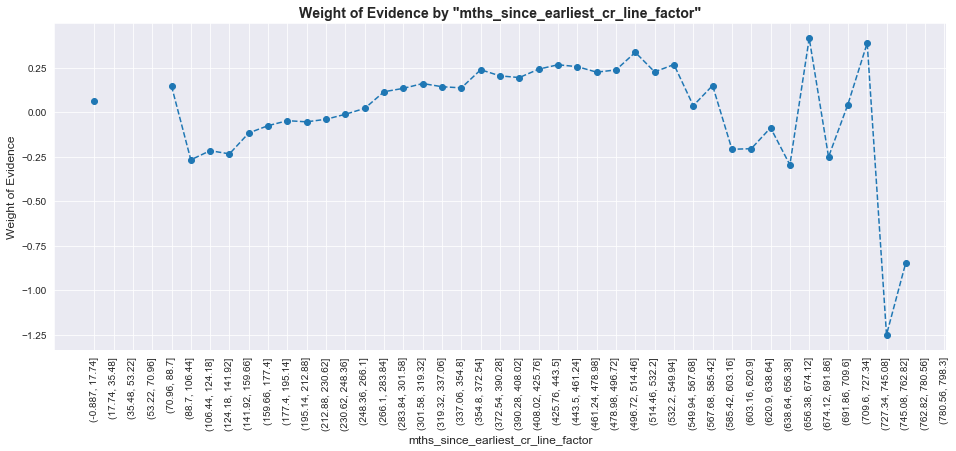

In [110]:
plot_by_woe(df_Con_Woe_IV_msecl, 90)

In [111]:
df_Con_Woe_IV_msecl.iloc[8:, : ]

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
8                    (141.92, 159.66]  27308   0.878717  0.121283    5.856504   
9                     (159.66, 177.4]  34811   0.883025  0.116975    7.465606   
10                    (177.4, 195.14]  44458   0.885870  0.114130    9.534512   
11                   (195.14, 212.88]  49798   0.885216  0.114784   10.679734   
12                   (212.88, 230.62]  49182   0.886686  0.113314   10.547626   
13                   (230.62, 248.36]  37533   0.889457  0.110543    8.049369   
14                    (248.36, 266.1]  34470   0.892689  0.107311    7.392475   
15                    (266.1, 283.84]  28736   0.901308  0.098692    6.162755   
16                   (283.84, 301.58]  23943   0.902978  0.097022    5.134842   
17                   (301.58, 319.32]  15864   0.905320  0.094680    3.402211   
18                   (319.32, 337.06]  16057   0.903780  0.096220    3.443602   
19                    (337.06, 354.8]  13008   0.903213  0.096787    2.789710   
20                    (354.8, 372.54]  10834   0.911759  0.088241    2.323472   
21                   (372.54, 390.28]   8720   0.908945  0.091055    1.870101   
22                   (390.28, 408.02]   7502   0.908158  0.091842    1.608887   
23                   (408.02, 425.76]   5422   0.912025  0.087975    1.162808   
24                    (425.76, 443.5]   3720   0.913978  0.086022    0.797795   
25                    (443.5, 461.24]   3028   0.913144  0.086856    0.649388   
26                   (461.24, 478.98]   2776   0.910663  0.089337    0.595344   
27                   (478.98, 496.72]   2332   0.911664  0.088336    0.500123   
28                   (496.72, 514.46]   1549   0.919303  0.080697    0.332200   
29                    (514.46, 532.2]   1222   0.910802  0.089198    0.262071   
30                    (532.2, 549.94]    931   0.914071  0.085929    0.199663   
31                   (549.94, 567.68]    680   0.894118  0.105882    0.145834   
32                   (567.68, 585.42]    596   0.904362  0.095638    0.127819   
33                   (585.42, 603.16]    411   0.868613  0.131387    0.088144   
34                    (603.16, 620.9]    290   0.868966  0.131034    0.062194   
35                    (620.9, 638.64]    203   0.881773  0.118227    0.043536   
36                   (638.64, 656.38]    127   0.858268  0.141732    0.027237   
37                   (656.38, 674.12]     80   0.925000  0.075000    0.017157   
38                   (674.12, 691.86]     44   0.863636  0.136364    0.009436   
39                    (691.86, 709.6]     38   0.894737  0.105263    0.008150   
40                    (709.6, 727.34]     13   0.923077  0.076923    0.002788   
41                   (727.34, 745.08]     10   0.700000  0.300000    0.002145   
42                   (745.08, 762.82]      9   0.777778  0.222222    0.001930   
43                   (762.82, 780.56]      4   1.000000  0.000000    0.000858   
44                    (780.56, 798.3]      1   1.000000  0.000000    0.000214   
45                    (798.3, 816.04]      6   1.000000  0.000000    0.001287   
46                   (816.04, 833.78]      1   1.000000  0.000000    0.000214   
47                   (833.78, 851.52]      1   1.000000  0.000000    0.000214   
48                   (851.52, 869.26]      2   1.000000  0.000000    0.000429   
49                    (869.26, 887.0]      1   1.000000  0.000000    0.000214   

     n_good   n_bad  prop_n_good  prop_n_bad       WoE            IV  sum_IV  
8   23996.0  3312.0     5.777755    6.498195 -0.117509  8.465828e-04     inf  
9   30739.0  4072.0     7.401334    7.989327 -0.076446  4.494976e-04     inf  
10  39384.0  5074.0     9.482877    9.955266 -0.048614  2.296469e-04     inf  
11  44082.0  5716.0    10.614061   11.214880 -0.055062  3.308218e-04     inf  
12  43609.0  5573.0    10.500172   10.934312 -0.040514  1.758876e-04     inf  
13  33384.0  4149.0     8.038197    8.140402 

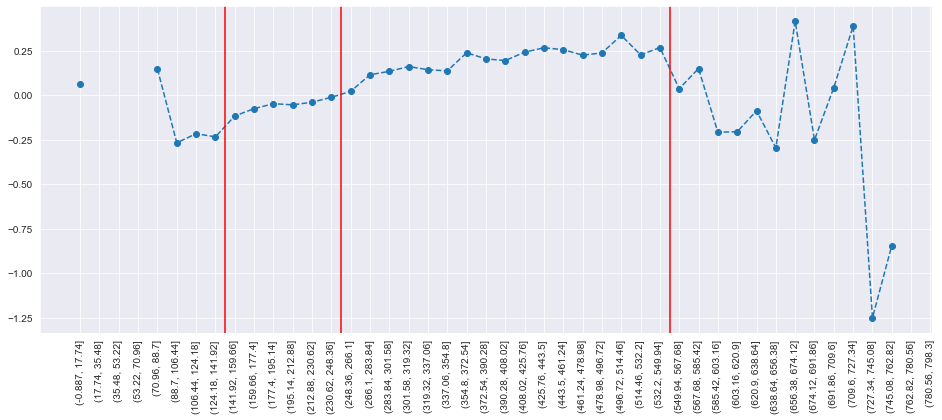

In [112]:
data = df_Con_Woe_IV_msecl
plt.figure(figsize=(16,6))
plt.plot(np.array(data['mths_since_earliest_cr_line_factor'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([7.5], color='red') # <141
plt.axvline([13.5], color='red') # 141 - 248
plt.axvline([30.5], color='red') # 248 - 549
                                # > 549 

plt.show()

In [113]:
# We create the following categories:
# < 141
df_inputs_prepr['mths_since_earliest_cr_line:<141'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141)), 1, 0)

# 141 - 248
df_inputs_prepr['mths_since_earliest_cr_line:141-248'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(141, 248)), 1, 0)

# 248 - 549
df_inputs_prepr['mths_since_earliest_cr_line:248-549'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 549)), 1, 0)

# > 549
df_inputs_prepr['mths_since_earliest_cr_line:>549'] = np.where((df_inputs_prepr['mths_since_earliest_cr_line']>549), 1, 0)

### `delinq_2yrs`

In [114]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 12., 17., 18., 29., 24., 14., 21., 22., 19., 16.])

In [115]:
df_inputs_prepr['delinq_2yrs'].nunique()
# No need to fine classing

24

In [116]:
df_Con_Woe_IV_delinq_2yrs= Woe_IV_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_Con_Woe_IV_delinq_2yrs

delinq_2yrs   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0           0.0  382983   0.890588  0.109412   82.134960  341080.0  41903.0   
1           1.0   56224   0.892679  0.107321   12.057862   50190.0   6034.0   
2           2.0   16310   0.888228  0.111772    3.497861   14487.0   1823.0   
3           3.0    5684   0.885292  0.114708    1.218997    5032.0    652.0   
4           4.0    2378   0.896131  0.103869    0.509989    2131.0    247.0   
5           5.0    1236   0.888350  0.111650    0.265074    1098.0    138.0   
6           6.0     629   0.893482  0.106518    0.134896     562.0     67.0   
7           7.0     346   0.872832  0.127168    0.074204     302.0     44.0   
8           8.0     177   0.903955  0.096045    0.037960     160.0     17.0   
9           9.0     111   0.900901  0.099099    0.023805     100.0     11.0   
10         10.0      65   0.861538  0.138462    0.013940      56.0      9.0   
11         11.0      41   0.926829  0.073171    0.008793      38.0      3.0   
12         12.0      38   0.710526  0.289474    0.008150      27.0     11.0   
13         13.0      25   0.840000  0.160000    0.005362      21.0      4.0   
14         14.0       8   0.875000  0.125000    0.001716       7.0      1.0   
15         15.0       7   0.857143  0.142857    0.001501       6.0      1.0   
16         16.0       5   1.000000  0.000000    0.001072       5.0      0.0   
17         17.0       3   0.666667  0.333333    0.000643       2.0      1.0   
18         18.0       6   0.833333  0.166667    0.001287       5.0      1.0   
19         19.0       3   1.000000  0.000000    0.000643       3.0      0.0   
20         21.0       2   0.500000  0.500000    0.000429       1.0      1.0   
21         22.0       2   1.000000  0.000000    0.000429       2.0      0.0   
22         24.0       1   1.000000  0.000000    0.000214       1.0      0.0   
23         29.0       1   1.000000  0.000000    0.000214       1.0      0.0   

    prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0     82.125220   82.214331 -0.001084  9.663761e-07     inf  
1     12.084745   11.838801  0.020562  5.056995e-05     inf  
2      3.488179    3.576754 -0.025076  2.221101e-05     inf  
3      1.211605    1.279234 -0.054316  3.673349e-05     inf  
4      0.513102    0.484618  0.057114  1.626855e-05     inf  
5      0.264376    0.270758 -0.023852  1.522187e-06     inf  
6      0.135318    0.131455  0.028965  1.119008e-06     inf  
7      0.072716    0.086329 -0.171607  2.336106e-05     inf  
8      0.038525    0.033354  0.144116  7.451577e-06     inf  
9      0.024078    0.021582  0.109431  2.731201e-06     inf  
10     0.013484    0.017658 -0.269717  1.125923e-05     inf  
11     0.009150    0.005886  0.441130  1.439667e-05     inf  
12     0.006501    0.021582 -1.199903  1.809586e-04     inf  
13     0.005056    0.007848 -0.439616  1.227269e-05     inf  
14     0.001685    0.001962 -0.151934  4.201822e-07     inf  
15     0.001445    0.001962 -0.306085  1.583485e-06     inf  
16     0.001204    0.000000       inf           inf     inf  
17     0.000482    0.001962 -1.404697  2.079591e-05     inf  
18     0.001204    0.001962 -0.488406  3.702684e-06     inf  
19     0.000722    0.000000       inf           inf     inf  
20     0.000241    0.001962 -2.097844  3.610884e-05     inf  
21     0.000482    0.000000       inf           inf     inf  
22     0.000241    0.000000       inf           inf     inf  
23     0.000241    0.000000       inf           inf     inf

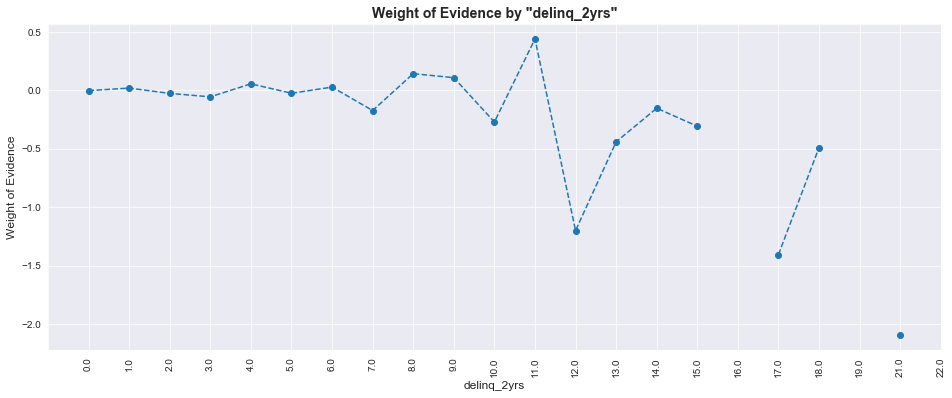

In [117]:
plot_by_woe(df_Con_Woe_IV_delinq_2yrs,90)

In [118]:
# Categories: 0 
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
# Categories: 1-3
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
# Categories: >=4
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

### `inq_last_6mths`

Definition : Simply put, a credit inquiry is a credit check. Inquiries happen when there is a legally permitted request to see your credit report from a company or person.

- https://www.transunion.com/article/credit-corner-whats-an-inquiry
- https://www.lendingclub.com/loans/resource-center/key-terms-about-money-and-credit

In [119]:
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [120]:
df_inputs_prepr['inq_last_6mths'].nunique()

28

In [121]:
df_Con_Woe_IV_inq_last6 = Woe_IV_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_Con_Woe_IV_inq_last6

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


inq_last_6mths   n_obs  prop_good  prop_bad  prop_n_obs    n_good  \
0              0.0  241527   0.908735  0.091265   51.798149  219484.0   
1              1.0  130148   0.884439  0.115561   27.911685  115108.0   
2              2.0   57825   0.863606  0.136394   12.401214   49938.0   
3              3.0   25126   0.841001  0.158999    5.388550   21131.0   
4              4.0    7241   0.846982  0.153018    1.552913    6133.0   
5              5.0    2768   0.828396  0.171604    0.593628    2293.0   
6              6.0    1188   0.783670  0.216330    0.254780     931.0   
7              7.0     195   0.651282  0.348718    0.041820     127.0   
8              8.0     122   0.622951  0.377049    0.026164      76.0   
9              9.0      50   0.640000  0.360000    0.010723      32.0   
10            10.0      24   0.875000  0.125000    0.005147      21.0   
11            11.0      15   0.800000  0.200000    0.003217      12.0   
12            12.0      15   0.600000  0.400000    0.003217       9.0   
13            13.0       6   0.666667  0.333333    0.001287       4.0   
14            14.0       6   0.166667  0.833333    0.001287       1.0   
15            15.0       9   0.444444  0.555556    0.001930       4.0   
16            16.0       3   1.000000  0.000000    0.000643       3.0   
17            17.0       2   0.500000  0.500000    0.000429       1.0   
18            18.0       4   0.500000  0.500000    0.000858       2.0   
19            19.0       2   1.000000  0.000000    0.000429       2.0   
20            20.0       1   0.000000  1.000000    0.000214       0.0   
21            24.0       2   1.000000  0.000000    0.000429       2.0   
22            25.0       1   0.000000  1.000000    0.000214       0.0   
23            27.0       1   1.000000  0.000000    0.000214       1.0   
24            28.0       1   1.000000  0.000000    0.000214       1.0   
25            31.0       1   1.000000  0.000000    0.000214       1.0   
26            32.0       1   0.000000  1.000000    0.000214       0.0   
27            33.0       1   0.000000  1.000000    0.000214       0.0   

      n_bad  prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0   22043.0    52.847343   43.248705  0.200440  0.019240     inf  
1   15040.0    27.715697   29.508711 -0.062687  0.001124     inf  
2    7887.0    12.024068   15.474415 -0.252278  0.008704     inf  
3    3995.0     5.087921    7.838251 -0.432147  0.011885     inf  
4    1108.0     1.476703    2.173913 -0.386717  0.002696     inf  
5     475.0     0.552108    0.931957 -0.523543  0.001989     inf  
6     257.0     0.224166    0.504238 -0.810661  0.002270     inf  
7      68.0     0.030579    0.133417 -1.473165  0.001515     inf  
8      46.0     0.018299    0.090253 -1.595752  0.001148     inf  
9      18.0     0.007705    0.035316 -1.522480  0.000420     inf  
10      3.0     0.005056    0.005886 -0.151934  0.000001     inf  
11      3.0     0.002889    0.005886 -0.711550  0.000021     inf  
12      6.0     0.002167    0.011772 -1.692379  0.000163     inf  
13      2.0     0.000963    0.003924 -1.404697  0.000042     inf  
14      5.0     0.000241    0.009810 -3.707282  0.000355     inf  
15      5.0     0.000963    0.009810 -2.320988  0.000205     inf  
16      0.0     0.000722    0.000000       inf       inf     inf  
17      1.0     0.000241    0.001962 -2.097844  0.000036     inf  
18      2.0     0.000482    0.003924 -2.097844  0.000072     inf  
19      0.0     0.000482    0.000000       inf       inf     inf  
20      1.0     0.000000    0.001962      -inf       inf     inf  
21      0.0     0.000482    0.000000       inf       inf     inf  
22      1.0     0.000000    0.001962      -inf       inf     inf  
23      0.0     0.000241    0.000000       inf       inf     inf  
24      0.0     0.000241    0.000000       inf       inf     inf  
25      0.0     0.000241    0.000000       inf       inf     inf  
26      1.0     0.000000    0.001962      -inf       inf     inf  
27      1.

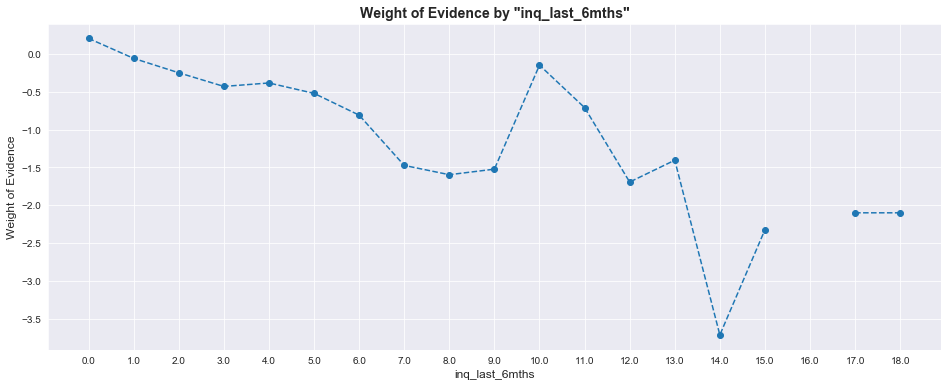

In [122]:
plot_by_woe(df_Con_Woe_IV_inq_last6,0)

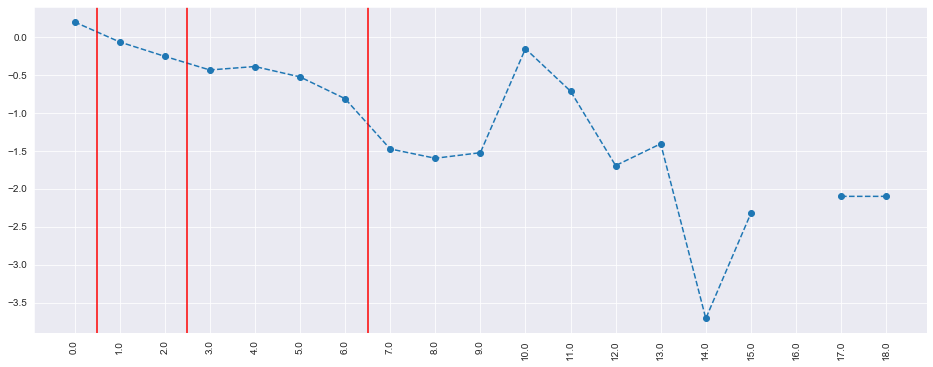

In [123]:
data = df_Con_Woe_IV_inq_last6
plt.figure(figsize=(16,6))
plt.plot(np.array(data['inq_last_6mths'].apply(str)), data['WoE'], '--o')
plt.xticks(rotation = 90)
plt.axvline([0.5], color='red') # = 0
plt.axvline([2.5], color='red') # 1-2
plt.axvline([6.5], color='red') # 3-6
plt.show()                                

In [124]:
# Categories: 0
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
# Categories 1 - 2
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
# Categories 3 - 6
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
# Categories > 6
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### `open_acc`

In [125]:
df_inputs_prepr['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47.,  0., 40., 45., 49., 53., 51., 43., 62.,
       48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [126]:
df_inputs_prepr['open_acc'].nunique()

62

In [127]:
# pd.options.display.max_rows = None
pd.set_option("display.max_rows",None)

In [128]:
df_Con_Woe_IV_open_acc = Woe_IV_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_Con_Woe_IV_open_acc

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0        0.0     36   0.805556  0.194444    0.007721     29.0     7.0   
1        1.0    142   0.873239  0.126761    0.030453    124.0    18.0   
2        2.0   1790   0.844134  0.155866    0.383885   1511.0   279.0   
3        3.0   5500   0.869455  0.130545    1.179536   4782.0   718.0   
4        4.0  12588   0.891643  0.108357    2.699636  11224.0  1364.0   
5        5.0  21544   0.891292  0.108708    4.620350  19202.0  2342.0   
6        6.0  30837   0.892045  0.107955    6.613337  27508.0  3329.0   
7        7.0  37602   0.890618  0.109382    8.064167  33489.0  4113.0   
8        8.0  41893   0.891509  0.108491    8.984419  37348.0  4545.0   
9        9.0  44019   0.889002  0.110998    9.440364  39133.0  4886.0   
10      10.0  42512   0.889067  0.110933    9.117171  37796.0  4716.0   
11      11.0  39112   0.887605  0.112395    8.388003  34716.0  4396.0   
12      12.0  34585   0.888796  0.111204    7.417138  30739.0  3846.0   
13      13.0  29806   0.895021  0.104979    6.392228  26677.0  3129.0   
14      14.0  24730   0.890619  0.109381    5.303623  22025.0  2705.0   
15      15.0  20234   0.891865  0.108135    4.339406  18046.0  2188.0   
16      16.0  16809   0.894759  0.105241    3.604877  15040.0  1769.0   
17      17.0  13392   0.890905  0.109095    2.872063  11931.0  1461.0   
18      18.0  10865   0.896641  0.103359    2.330120   9742.0  1123.0   
19      19.0   8647   0.892795  0.107205    1.854445   7720.0   927.0   
20      20.0   6668   0.895021  0.104979    1.430027   5968.0   700.0   
21      21.0   5279   0.893730  0.106270    1.132140   4718.0   561.0   
22      22.0   4097   0.892604  0.107396    0.878647   3657.0   440.0   
23      23.0   3158   0.901520  0.098480    0.677268   2847.0   311.0   
24      24.0   2452   0.891109  0.108891    0.525859   2185.0   267.0   
25      25.0   1933   0.888257  0.111743    0.414553   1717.0   216.0   
26      26.0   1314   0.902588  0.097412    0.281802   1186.0   128.0   
27      27.0   1067   0.903468  0.096532    0.228830    964.0   103.0   
28      28.0    766   0.904700  0.095300    0.164277    693.0    73.0   
29      29.0    624   0.889423  0.110577    0.133824    555.0    69.0   
30      30.0    484   0.890496  0.109504    0.103799    431.0    53.0   
31      31.0    358   0.902235  0.097765    0.076777    323.0    35.0   
32      32.0    296   0.912162  0.087838    0.063480    270.0    26.0   
33      33.0    222   0.873874  0.126126    0.047610    194.0    28.0   
34      34.0    185   0.886486  0.113514    0.039675    164.0    21.0   
35      35.0    157   0.923567  0.076433    0.033670    145.0    12.0   
36      36.0    126   0.849206  0.150794    0.027022    107.0    19.0   
37      37.0    100   0.880000  0.120000    0.021446     88.0    12.0   
38      38.0     78   0.884615  0.115385    0.016728     69.0     9.0   
39      39.0     67   0.925373  0.074627    0.014369     62.0     5.0   
40      40.0     39   0.846154  0.153846    0.008364     33.0     6.0   
41      41.0     36   0.888889  0.111111    0.007721     32.0     4.0   
42      42.0     29   0.965517  0.034483    0.006219     28.0     1.0   
43      43.0     19   0.894737  0.105263    0.004075     17.0     2.0   
44      44.0     12   0.916667  0.083333    0.002574     11.0     1.0   
45      45.0     18   0.888889  0.111111    0.003860     16.0     2.0   
46      46.0      7   1.000000  0.000000    0.001501      7.0     0.0   
47      47.0      6   0.833333  0.166667    0.001287      5.0     1.0   
48      48.0      6   1.000000  0.000000    0.001287      6.0     0.0   
49      49.0      8   1.000000  0.000000    0.001716      8.0     0.0   
50      50.0      5   1.000000  0.000000    0.001072      5.0     0.0   
51      51.0      5   1.000000  0.000000    0.001072      5.0     0.0   
52      52.0      2   1.000000  0.000000    0.000429      2.0     0.0   
53      53.0      5   1.000000  0.000000    0.001072      5.0 

In [129]:
pd.reset_option('display.max_rows')

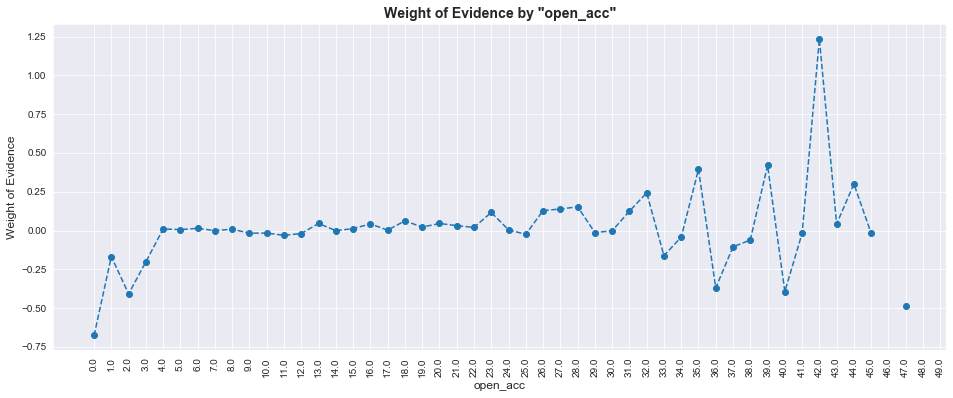

In [130]:
plot_by_woe(df_Con_Woe_IV_open_acc, 90)
# from 41 - end :we found sam case as funded_amount_factor 

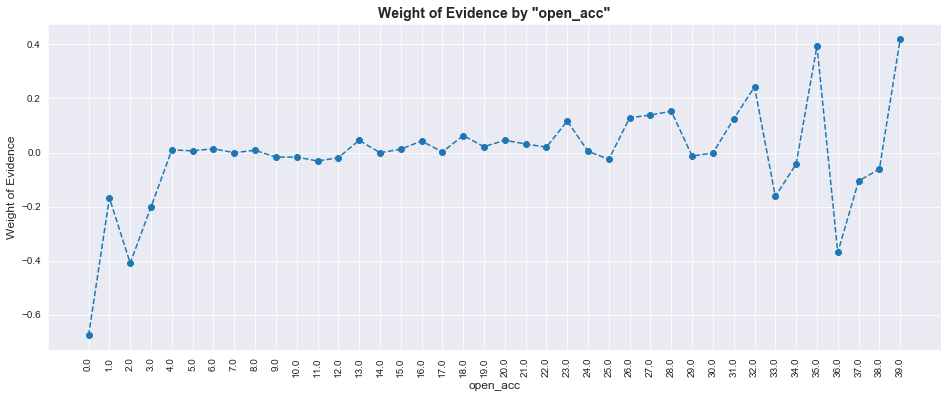

In [131]:
# Exclue value > 40
plot_by_woe(df_Con_Woe_IV_open_acc.iloc[ :40 , :], 90)

In [132]:
# 0
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
# 1-3
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
# 4-12
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
# 13-17
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
# 18-22
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
# 23-25
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
# 26-30
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
# >30
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### `pub_rec`

Number of derogatory public records

If you’ve experienced financial misfortune, from late bills to bankruptcy, that negative information can appear on your credit reports as a “derogatory mark.” It may stay there for several years, but there are a few ways you can address it: dispute the mark if it’s an error, start healing your credit or wait out the clock.

https://www.creditkarma.com/advice/i/what-does-derogatory-mean

In [133]:
df_Con_Woe_IV_pub_rec = Woe_IV_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_Con_Woe_IV_pub_rec

pub_rec   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0       0.0  404922   0.889789  0.110211   86.840023  360295.0  44627.0   
1       1.0   53051   0.894969  0.105031   11.377376   47479.0   5572.0   
2       2.0    5624   0.903450  0.096550    1.206129    5081.0    543.0   
3       3.0    1611   0.916201  0.083799    0.345497    1476.0    135.0   
4       4.0     520   0.909615  0.090385    0.111520     473.0     47.0   
5       5.0     276   0.909420  0.090580    0.059191     251.0     25.0   
6       6.0     136   0.926471  0.073529    0.029167     126.0     10.0   
7       7.0      62   0.919355  0.080645    0.013297      57.0      5.0   
8       8.0      29   0.965517  0.034483    0.006219      28.0      1.0   
9       9.0      16   0.812500  0.187500    0.003431      13.0      3.0   
10     10.0      13   1.000000  0.000000    0.002788      13.0      0.0   
11     11.0       8   1.000000  0.000000    0.001716       8.0      0.0   
12     12.0       2   1.000000  0.000000    0.000429       2.0      0.0   
13     13.0       2   1.000000  0.000000    0.000429       2.0      0.0   
14     14.0       1   1.000000  0.000000    0.000214       1.0      0.0   
15     15.0       1   1.000000  0.000000    0.000214       1.0      0.0   
16     16.0       1   1.000000  0.000000    0.000214       1.0      0.0   
17     17.0       1   1.000000  0.000000    0.000214       1.0      0.0   
18     18.0       2   1.000000  0.000000    0.000429       2.0      0.0   
19     19.0       1   1.000000  0.000000    0.000214       1.0      0.0   
20     21.0       1   1.000000  0.000000    0.000214       1.0      0.0   
21     34.0       1   1.000000  0.000000    0.000214       1.0      0.0   
22     40.0       1   1.000000  0.000000    0.000214       1.0      0.0   
23     49.0       1   1.000000  0.000000    0.000214       1.0      0.0   
24     54.0       1   1.000000  0.000000    0.000214       1.0      0.0   
25     63.0       1   1.000000  0.000000    0.000214       1.0      0.0   

    prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0     86.751806   87.558860 -0.009260  0.000075     inf  
1     11.431991   10.932350  0.044689  0.000223     inf  
2      1.223403    1.065374  0.138310  0.000219     inf  
3      0.355391    0.264872  0.293972  0.000266     inf  
4      0.113889    0.092215  0.211104  0.000046     inf  
5      0.060436    0.049050  0.208733  0.000024     inf  
6      0.030338    0.019620  0.435853  0.000047     inf  
7      0.013724    0.009810  0.335769  0.000013     inf  
8      0.006742    0.001962  1.234360  0.000059     inf  
9      0.003130    0.005886 -0.631507  0.000017     inf  
10     0.003130    0.000000       inf       inf     inf  
11     0.001926    0.000000       inf       inf     inf  
12     0.000482    0.000000       inf       inf     inf  
13     0.000482    0.000000       inf       inf     inf  
14     0.000241    0.000000       inf       inf     inf  
15     0.000241    0.000000       inf       inf     inf  
16     0.000241    0.000000       inf       inf     inf  
17     0.000241    0.000000       inf       inf     inf  
18     0.000482    0.000000       inf       inf     inf  
19     0.000241    0.000000       inf       inf     inf  
20     0.000241    0.000000       inf       inf     inf  
21     0.000241    0.000000       inf       inf     inf  
22     0.000241    0.000000       inf       inf     inf  
23     0.000241    0.000000       inf       inf     inf  
24     0.000241    0.000000       inf       inf     inf  
25     0.000241    0.000000       inf       inf     inf

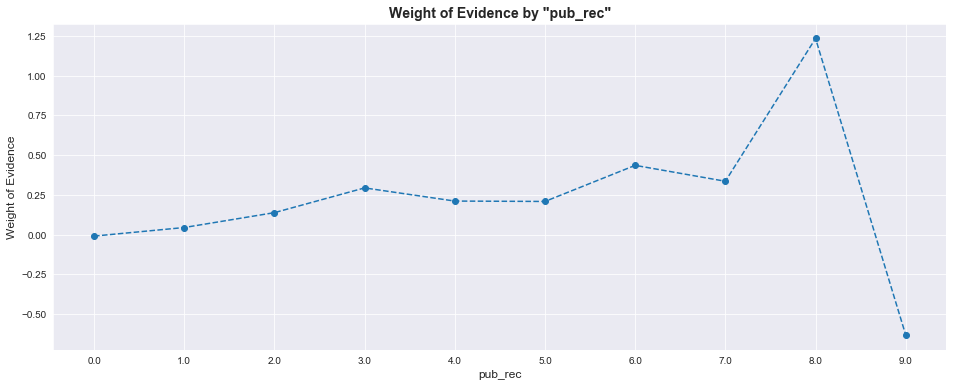

In [134]:
plot_by_woe(df_Con_Woe_IV_pub_rec)

In [135]:
#0-2
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec']>=0)&(df_inputs_prepr['pub_rec']<=2),1,0)
#3-4
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec']>=3)&(df_inputs_prepr['pub_rec']<=4),1,0)
#>=5
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

### `total_acc`

The total number of credit lines currently in the borrower's credit file

https://www.rockethq.com/learn/credit/how-many-lines-of-credit-should-i-have

In [136]:
df_inputs_prepr['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1.,   0., 105.,  83.,  84.,  98.,
        88.,  82.,  91.,  99.,  86.,  93.,  92.,  96., 101., 150.,  95.,
        85., 156.,  89., 106.,  97., 119., 124., 100.,  94., 121., 102.,
       117., 116., 118.])

In [137]:
df_inputs_prepr['total_acc'].nunique()

113

In [138]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_inputs_prepr['total_acc_factor']

0           (6.24, 9.36]
1           (3.12, 6.24]
2          (9.36, 12.48]
3         (34.32, 37.44]
4         (37.44, 40.56]
               ...      
466280    (34.32, 37.44]
466281     (28.08, 31.2]
466282    (40.56, 43.68]
466283    (24.96, 28.08]
466284    (21.84, 24.96]
Name: total_acc_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(-0.156, 3.12] < (3.12, 6.24] < (6.24, 9.36] < (9.36, 12.48] ... (143.52, 146.64] < (146.64, 149.76] < (149.76, 152.88] < (152.88, 156.0]]

In [139]:
df_Con_Woe_IV_total_acc = Woe_IV_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_Con_Woe_IV_total_acc

total_acc_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    584   0.803082  0.196918    0.125245    469.0   115.0   
1       (3.12, 6.24]   7503   0.861922  0.138078    1.609102   6467.0  1036.0   
2       (6.24, 9.36]  18762   0.872881  0.127119    4.023719  16377.0  2385.0   
3      (9.36, 12.48]  31457   0.879995  0.120005    6.746303  27682.0  3775.0   
4      (12.48, 15.6]  41940   0.882666  0.117334    8.994499  37019.0  4921.0   
5      (15.6, 18.72]  48554   0.887857  0.112143   10.412945  43109.0  5445.0   
6     (18.72, 21.84]  50869   0.887712  0.112288   10.909422  45157.0  5712.0   
7     (21.84, 24.96]  50134   0.891750  0.108250   10.751793  44707.0  5427.0   
8     (24.96, 28.08]  59229   0.895338  0.104662   12.702317  53030.0  6199.0   
9      (28.08, 31.2]  37156   0.897136  0.102864    7.968517  33334.0  3822.0   
10     (31.2, 34.32]  30393   0.898167  0.101833    6.518117  27298.0  3095.0   
11    (34.32, 37.44]  23820   0.900000  0.100000    5.108464  21438.0  2382.0   
12    (37.44, 40.56]  18278   0.900427  0.099573    3.919920  16458.0  1820.0   
13    (40.56, 43.68]  13892   0.897999  0.102001    2.979294  12475.0  1417.0   
14     (43.68, 46.8]  10132   0.895973  0.104027    2.172920   9078.0  1054.0   
15     (46.8, 49.92]   7270   0.896836  0.103164    1.559132   6520.0   750.0   
16    (49.92, 53.04]   6484   0.906848  0.093152    1.390566   5880.0   604.0   
17    (53.04, 56.16]   3099   0.903195  0.096805    0.664615   2799.0   300.0   
18    (56.16, 59.28]   2205   0.892517  0.107483    0.472887   1968.0   237.0   
19     (59.28, 62.4]   1838   0.892274  0.107726    0.394180   1640.0   198.0   
20     (62.4, 65.52]   1716   0.890443  0.109557    0.368015   1528.0   188.0   
21    (65.52, 68.64]    297   0.915825  0.084175    0.063695    272.0    25.0   
22    (68.64, 71.76]    200   0.905000  0.095000    0.042892    181.0    19.0   
23    (71.76, 74.88]    135   0.940741  0.059259    0.028952    127.0     8.0   
24     (74.88, 78.0]    121   0.892562  0.107438    0.025950    108.0    13.0   
25     (78.0, 81.12]     65   0.876923  0.123077    0.013940     57.0     8.0   
26    (81.12, 84.24]     36   0.888889  0.111111    0.007721     32.0     4.0   
27    (84.24, 87.36]     36   0.944444  0.055556    0.007721     34.0     2.0   
28    (87.36, 90.48]     28   0.892857  0.107143    0.006005     25.0     3.0   
29     (90.48, 93.6]     19   0.894737  0.105263    0.004075     17.0     2.0   
30     (93.6, 96.72]      9   0.888889  0.111111    0.001930      8.0     1.0   
31    (96.72, 99.84]      7   0.857143  0.142857    0.001501      6.0     1.0   
32   (99.84, 102.96]      4   1.000000  0.000000    0.000858      4.0     0.0   
33  (102.96, 106.08]      5   1.000000  0.000000    0.001072      5.0     0.0   
34   (106.08, 109.2]      0        NaN       NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN       NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN       NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      3   1.000000  0.000000    0.000643      3.0     0.0   
38  (118.56, 121.68]      2   1.000000  0.000000    0.000429      2.0     0.0   
39   (121.68, 124.8]      1   1.000000  0.000000    0.000214      1.0     0.0   
40   (124.8, 127.92]      0        NaN       NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN       NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN       NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN       NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN       NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN       NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN       NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN       NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      1   1.000

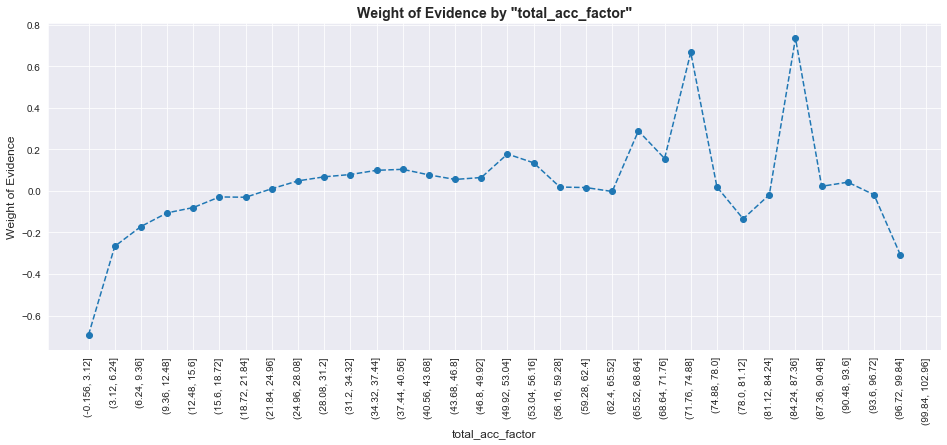

In [140]:
plot_by_woe(df_Con_Woe_IV_total_acc,90)

In [141]:
#<=21
df_inputs_prepr['total_acc:<=21'] = np.where((df_inputs_prepr['total_acc']<=21),1,0)
#22-51
df_inputs_prepr['total_acc:<=21'] = np.where((df_inputs_prepr['total_acc']>=22)&(df_inputs_prepr['total_acc']<=51),1,0)
#>51
df_inputs_prepr['total_acc:<=21'] = np.where((df_inputs_prepr['total_acc']>=52),1,0)

### `acc_now_delinq`

The number of accounts on which the borrower is now delinquent.



In [142]:
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 5., 4.])

In [143]:
df_inputs_prepr['acc_now_delinq'].nunique()

6

In [144]:
df_Con_Woe_IV_acc_now_delinq = Woe_IV_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_Con_Woe_IV_acc_now_delinq

acc_now_delinq   n_obs  prop_good  prop_bad  prop_n_obs    n_good    n_bad  \
0             0.0  464553   0.890684  0.109316   99.628553  413770.0  50783.0   
1             1.0    1623   0.893407  0.106593    0.348070    1450.0    173.0   
2             2.0      92   0.902174  0.097826    0.019730      83.0      9.0   
3             3.0      11   0.818182  0.181818    0.002359       9.0      2.0   
4             4.0       4   1.000000  0.000000    0.000858       4.0      0.0   
5             5.0       2   0.500000  0.500000    0.000429       1.0      1.0   

   prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0    99.627513   99.637027 -0.000095  9.084479e-09     inf  
1     0.349131    0.339429  0.028183  2.734397e-06     inf  
2     0.019985    0.017658  0.123772  2.879673e-06     inf  
3     0.002167    0.003924 -0.593767  1.043255e-05     inf  
4     0.000963    0.000000       inf           inf     inf  
5     0.000241    0.001962 -2.097844  3.610884e-05     inf

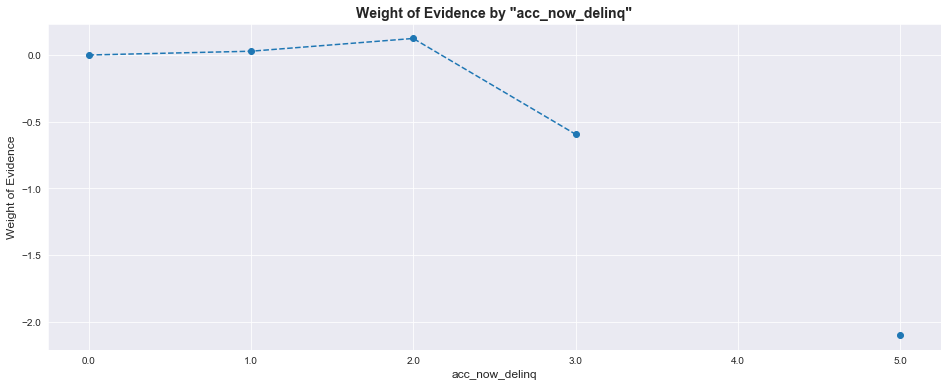

In [145]:
plot_by_woe(df_Con_Woe_IV_acc_now_delinq)

In [146]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### `total_rev_hi_lim`

Total revolving high credit/credit limit

https://www.investopedia.com/terms/r/revolvingcredit.asp

https://www.creditkarma.com/advice/i/what-is-revolving-credit

In [147]:
df_inputs_prepr['total_rev_hi_lim'].unique()

array([  5000.,   2500.,   2400., ..., 102342.,  71491., 479500.])

In [148]:
df_inputs_prepr['total_rev_hi_lim'].nunique()

14933

In [149]:
df_inputs_prepr['total_rev_hi_lim'].describe()

count    4.662850e+05
mean     2.757367e+04
std      3.509068e+04
min      0.000000e+00
25%      1.160000e+04
50%      2.010000e+04
75%      3.460000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

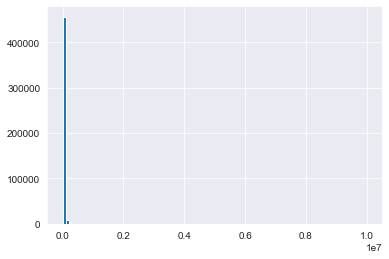

In [150]:
df_inputs_prepr['total_rev_hi_lim'].hist(bins=100)

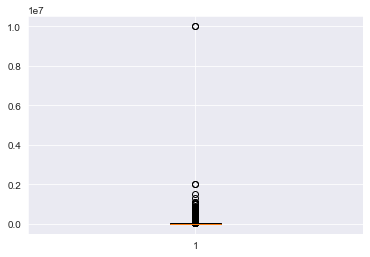

In [151]:
plt.boxplot(df_inputs_prepr['total_rev_hi_lim'])
plt.show()

In [152]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

In [153]:
pd.set_option('display.max_rows',None)

In [154]:
df_Con_Woe_IV_total_rev_hilim = Woe_IV_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_Con_Woe_IV_total_rev_hilim

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_rev_hi_lim_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0            (-9999.999, 5000.0]  24313   0.865340  0.134660    5.214193   
1             (5000.0, 9999.999]  65938   0.875565  0.124435   14.141137   
2          (9999.999, 14999.998]  74357   0.880307  0.119693   15.946685   
3         (14999.998, 19999.998]  64259   0.878103  0.121897   13.781057   
4         (19999.998, 24999.997]  51995   0.886855  0.113145   11.150906   
5         (24999.997, 29999.997]  40181   0.889873  0.110127    8.617262   
6         (29999.997, 34999.996]  30615   0.896293  0.103707    6.565727   
7         (34999.996, 39999.996]  24652   0.900698  0.099302    5.286895   
8         (39999.996, 44999.996]  18392   0.913712  0.086288    3.944369   
9         (44999.996, 49999.995]  14428   0.913779  0.086221    3.094245   
10        (49999.995, 54999.994]  11183   0.916570  0.083430    2.398319   
11        (54999.994, 59999.994]   8417   0.925389  0.074611    1.805119   
12        (59999.994, 64999.994]   6707   0.930669  0.069331    1.438391   
13        (64999.994, 69999.993]   5361   0.926133  0.073867    1.149726   
14        (69999.993, 74999.992]   4257   0.932582  0.067418    0.912961   
15        (74999.992, 79999.992]   3284   0.924482  0.075518    0.704290   
16        (79999.992, 84999.992]   2760   0.929710  0.070290    0.591913   
17        (84999.992, 89999.991]   2232   0.930108  0.069892    0.478677   
18         (89999.991, 94999.99]   1769   0.936687  0.063313    0.379382   
19          (94999.99, 99999.99]   1457   0.950583  0.049417    0.312470   
20         (99999.99, 104999.99]   1249   0.951962  0.048038    0.267862   
21       (104999.99, 109999.989]   1059   0.948064  0.051936    0.227114   
22      (109999.989, 114999.988]    861   0.943089  0.056911    0.184651   
23      (114999.988, 119999.988]    775   0.940645  0.059355    0.166207   
24      (119999.988, 124999.988]    585   0.950427  0.049573    0.125460   
25      (124999.988, 129999.987]    554   0.935018  0.064982    0.118811   
26      (129999.987, 134999.986]    433   0.956120  0.043880    0.092862   
27      (134999.986, 139999.986]    384   0.950521  0.049479    0.082353   
28      (139999.986, 144999.986]    382   0.947644  0.052356    0.081924   
29      (144999.986, 149999.985]    310   0.941935  0.058065    0.066483   
30      (149999.985, 154999.984]    259   0.942085  0.057915    0.055545   
31      (154999.984, 159999.984]    275   0.967273  0.032727    0.058977   
32      (159999.984, 164999.984]    215   0.953488  0.046512    0.046109   
33      (164999.984, 169999.983]    204   0.946078  0.053922    0.043750   
34      (169999.983, 174999.982]    155   0.922581  0.077419    0.033241   
35      (174999.982, 179999.982]    157   0.949045  0.050955    0.033670   
36      (179999.982, 184999.982]    127   0.992126  0.007874    0.027237   
37      (184999.982, 189999.981]    132   0.946970  0.053030    0.028309   
38       (189999.981, 194999.98]    107   0.962617  0.037383    0.022947   
39        (194999.98, 199999.98]     90   0.933333  0.066667    0.019302   
40        (199999.98, 204999.98]     97   0.979381  0.020619    0.020803   
41       (204999.98, 209999.979]     95   0.936842  0.063158    0.020374   
42      (209999.979, 214999.978]     80   0.987500  0.012500    0.017157   
43      (214999.978, 219999.978]     79   0.924051  0.075949    0.016942   
44      (219999.978, 224999.978]     75   0.933333  0.066667    0.016085   
45      (224999.978, 229999.977]     54   0.962963  0.037037    0.011581   
46      (229999.977, 234999.976]     65   0.923077  0.076923    0.013940   
47      (234999.976, 239999.976]     50   0.920000  0.080000    0.010723   
48      (239999.976, 244999.976]     41   0.951220  0.048780    0.008793   
49      (244999.976, 249999.975]     40   0.975000  0.025000    0.008578   
50      (249999.975, 254999.974]     35   0.914286  0.085714    0.007506   
51      (254999.974, 259999.974]     38   0.921053  0.078

In [155]:
pd.reset_option('display.max_rows')

In [156]:
df_Con_Woe_IV_total_rev_hilim.iloc[:50,:]

total_rev_hi_lim_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0        (-9999.999, 5000.0]  24313   0.865340  0.134660    5.214193  21039.0   
1         (5000.0, 9999.999]  65938   0.875565  0.124435   14.141137  57733.0   
2      (9999.999, 14999.998]  74357   0.880307  0.119693   15.946685  65457.0   
3     (14999.998, 19999.998]  64259   0.878103  0.121897   13.781057  56426.0   
4     (19999.998, 24999.997]  51995   0.886855  0.113145   11.150906  46112.0   
5     (24999.997, 29999.997]  40181   0.889873  0.110127    8.617262  35756.0   
6     (29999.997, 34999.996]  30615   0.896293  0.103707    6.565727  27440.0   
7     (34999.996, 39999.996]  24652   0.900698  0.099302    5.286895  22204.0   
8     (39999.996, 44999.996]  18392   0.913712  0.086288    3.944369  16805.0   
9     (44999.996, 49999.995]  14428   0.913779  0.086221    3.094245  13184.0   
10    (49999.995, 54999.994]  11183   0.916570  0.083430    2.398319  10250.0   
11    (54999.994, 59999.994]   8417   0.925389  0.074611    1.805119   7789.0   
12    (59999.994, 64999.994]   6707   0.930669  0.069331    1.438391   6242.0   
13    (64999.994, 69999.993]   5361   0.926133  0.073867    1.149726   4965.0   
14    (69999.993, 74999.992]   4257   0.932582  0.067418    0.912961   3970.0   
15    (74999.992, 79999.992]   3284   0.924482  0.075518    0.704290   3036.0   
16    (79999.992, 84999.992]   2760   0.929710  0.070290    0.591913   2566.0   
17    (84999.992, 89999.991]   2232   0.930108  0.069892    0.478677   2076.0   
18     (89999.991, 94999.99]   1769   0.936687  0.063313    0.379382   1657.0   
19      (94999.99, 99999.99]   1457   0.950583  0.049417    0.312470   1385.0   
20     (99999.99, 104999.99]   1249   0.951962  0.048038    0.267862   1189.0   
21   (104999.99, 109999.989]   1059   0.948064  0.051936    0.227114   1004.0   
22  (109999.989, 114999.988]    861   0.943089  0.056911    0.184651    812.0   
23  (114999.988, 119999.988]    775   0.940645  0.059355    0.166207    729.0   
24  (119999.988, 124999.988]    585   0.950427  0.049573    0.125460    556.0   
25  (124999.988, 129999.987]    554   0.935018  0.064982    0.118811    518.0   
26  (129999.987, 134999.986]    433   0.956120  0.043880    0.092862    414.0   
27  (134999.986, 139999.986]    384   0.950521  0.049479    0.082353    365.0   
28  (139999.986, 144999.986]    382   0.947644  0.052356    0.081924    362.0   
29  (144999.986, 149999.985]    310   0.941935  0.058065    0.066483    292.0   
30  (149999.985, 154999.984]    259   0.942085  0.057915    0.055545    244.0   
31  (154999.984, 159999.984]    275   0.967273  0.032727    0.058977    266.0   
32  (159999.984, 164999.984]    215   0.953488  0.046512    0.046109    205.0   
33  (164999.984, 169999.983]    204   0.946078  0.053922    0.043750    193.0   
34  (169999.983, 174999.982]    155   0.922581  0.077419    0.033241    143.0   
35  (174999.982, 179999.982]    157   0.949045  0.050955    0.033670    149.0   
36  (179999.982, 184999.982]    127   0.992126  0.007874    0.027237    126.0   
37  (184999.982, 189999.981]    132   0.946970  0.053030    0.028309    125.0   
38   (189999.981, 194999.98]    107   0.962617  0.037383    0.022947    103.0   
39    (194999.98, 199999.98]     90   0.933333  0.066667    0.019302     84.0   
40    (199999.98, 204999.98]     97   0.979381  0.020619    0.020803     95.0   
41   (204999.98, 209999.979]     95   0.936842  0.063158    0.020374     89.0   
42  (209999.979, 214999.978]     80   0.987500  0.012500    0.017157     79.0   
43  (214999.978, 219999.978]     79   0.924051  0.075949    0.016942     73.0   
44  (219999.978, 224999.978]     75   0.933333  0.066667    0.016085     70.0   
45  (224999.978, 229999.977]     54   0.962963  0.037037    0.011581     52.0   
46  (229999.977, 234999.976]     65   0.923077  0.076923    0.013940     60.0   
47  (234999.976, 239999.976]     50   0.920000  0.080000    0.010723     46.0   
48  (239999.976, 244999.976]     41 

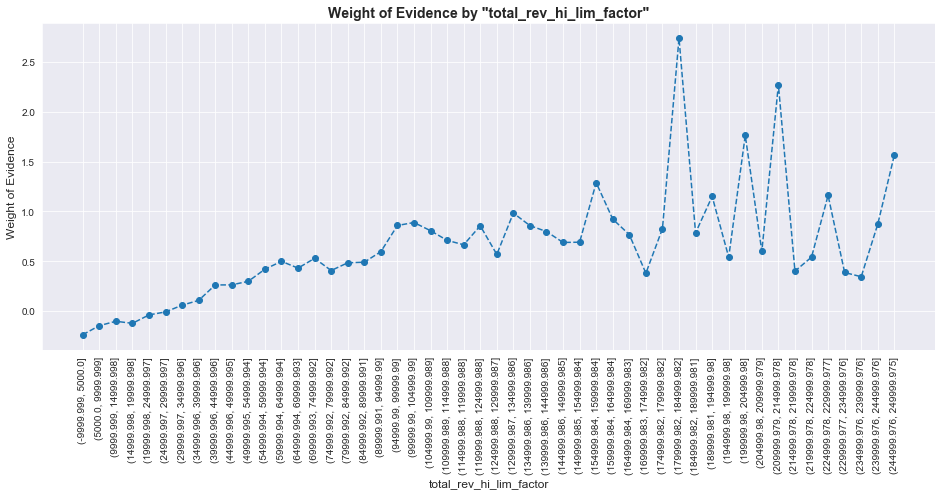

In [157]:
plot_by_woe(df_Con_Woe_IV_total_rev_hilim.iloc[:50,:],90)

In [158]:
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### `installment`

In [159]:
df_inputs_prepr['installment'].unique()

array([162.87,  59.83,  84.33, ..., 971.51, 372.77, 217.65])

In [160]:
df_inputs_prepr['installment'].nunique()

55622

In [161]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [162]:
df_Con_Woe_IV_installment = Woe_IV_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_Con_Woe_IV_installment

installment_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0       (14.276, 43.556]   2297   0.898999  0.101001    0.492617   2065.0   
1       (43.556, 71.443]   6090   0.898851  0.101149    1.306068   5474.0   
2       (71.443, 99.329]   8554   0.893617  0.106383    1.834500   7644.0   
3      (99.329, 127.216]  11440   0.891434  0.108566    2.453435  10198.0   
4     (127.216, 155.102]  12648   0.894450  0.105550    2.712504  11313.0   
5     (155.102, 182.988]  20953   0.894908  0.105092    4.493604  18751.0   
6     (182.988, 210.875]  21342   0.904836  0.095164    4.577029  19311.0   
7     (210.875, 238.761]  18804   0.900606  0.099394    4.032727  16935.0   
8     (238.761, 266.648]  23532   0.901028  0.098972    5.046699  21203.0   
9     (266.648, 294.534]  25075   0.890728  0.109272    5.377612  22335.0   
10     (294.534, 322.42]  25573   0.898213  0.101787    5.484414  22970.0   
11     (322.42, 350.307]  31943   0.889929  0.110071    6.850531  28427.0   
12    (350.307, 378.193]  23771   0.884691  0.115309    5.097955  21030.0   
13     (378.193, 406.08]  22416   0.895298  0.104702    4.807360  20069.0   
14     (406.08, 433.966]  16780   0.879976  0.120024    3.598657  14766.0   
15    (433.966, 461.852]  15802   0.882420  0.117580    3.388915  13944.0   
16    (461.852, 489.739]  19658   0.893224  0.106776    4.215877  17559.0   
17    (489.739, 517.625]  19494   0.890890  0.109110    4.180705  17367.0   
18    (517.625, 545.512]  13400   0.864179  0.135821    2.873779  11580.0   
19    (545.512, 573.398]  13179   0.878443  0.121557    2.826383  11577.0   
20    (573.398, 601.284]  11849   0.878133  0.121867    2.541150  10405.0   
21    (601.284, 629.171]  11674   0.905260  0.094740    2.503619  10568.0   
22    (629.171, 657.057]  10466   0.897764  0.102236    2.244550   9396.0   
23    (657.057, 684.944]  11484   0.892024  0.107976    2.462871  10244.0   
24     (684.944, 712.83]   7726   0.877686  0.122314    1.656927   6781.0   
25     (712.83, 740.716]   6081   0.885710  0.114290    1.304138   5386.0   
26    (740.716, 768.603]   6604   0.894761  0.105239    1.416301   5909.0   
27    (768.603, 796.489]   6150   0.900163  0.099837    1.318936   5536.0   
28    (796.489, 824.376]   5052   0.889549  0.110451    1.083458   4494.0   
29    (824.376, 852.262]   4605   0.886862  0.113138    0.987593   4084.0   
30    (852.262, 880.148]   5270   0.891651  0.108349    1.130210   4699.0   
31    (880.148, 908.035]   3999   0.871468  0.128532    0.857630   3485.0   
32    (908.035, 935.921]   2753   0.868870  0.131130    0.590411   2392.0   
33    (935.921, 963.808]   3059   0.873815  0.126185    0.656037   2673.0   
34    (963.808, 991.694]   2227   0.837000  0.163000    0.477605   1864.0   
35    (991.694, 1019.58]   2056   0.857004  0.142996    0.440932   1762.0   
36   (1019.58, 1047.467]   1574   0.871665  0.128335    0.337562   1372.0   
37  (1047.467, 1075.353]   1098   0.886157  0.113843    0.235478    973.0   
38   (1075.353, 1103.24]   1304   0.923313  0.076687    0.279657   1204.0   
39   (1103.24, 1131.126]   1040   0.922115  0.077885    0.223040    959.0   
40  (1131.126, 1159.012]   1218   0.920361  0.079639    0.261214   1121.0   
41  (1159.012, 1186.899]   1475   0.913898  0.086102    0.316330   1348.0   
42  (1186.899, 1214.785]   1571   0.902610  0.097390    0.336918   1418.0   
43  (1214.785, 1242.672]   1264   0.891614  0.108386    0.271079   1127.0   
44  (1242.672, 1270.558]    897   0.860647  0.139353    0.192372    772.0   
45  (1270.558, 1298.444]    561   0.827094  0.172906    0.120313    464.0   
46  (1298.444, 1326.331]    236   0.762712  0.237288    0.050613    180.0   
47  (1326.331, 1354.217]    147   0.761905  0.238095    0.031526    112.0   
48  (1354.217, 1382.104]     51   0.686275  0.313725    0.010938     35.0   
49   (1382.104, 1409.99]     43   0.837209  0.162791    0.009222     36.0   

     n_bad  prop_n_good  prop_n_bad       WoE            IV    sum_IV  
0    2

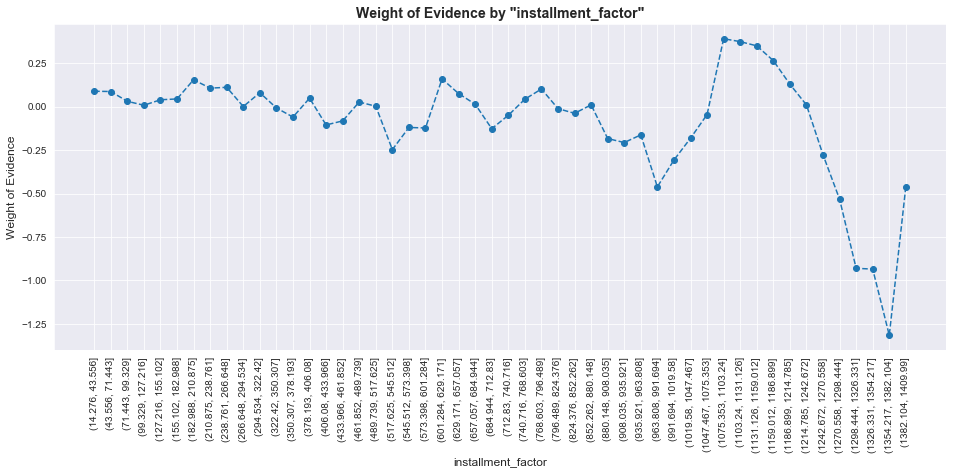

In [163]:
plot_by_woe(df_Con_Woe_IV_installment, 90)

Vary Low Information Value. No need for further fine classing.

## Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

### `annual_inc`

In [164]:
df_inputs_prepr['annual_inc'].unique()

array([ 24000.,  30000.,  12252., ..., 284481., 113926.,  72787.])

In [165]:
df_inputs_prepr['annual_inc'].nunique()

31902

In [166]:
# Fine Classing
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor']

0         (-5602.104, 151858.08]
1         (-5602.104, 151858.08]
2         (-5602.104, 151858.08]
3         (-5602.104, 151858.08]
4         (-5602.104, 151858.08]
                   ...          
466280    (-5602.104, 151858.08]
466281    (-5602.104, 151858.08]
466282    (-5602.104, 151858.08]
466283    (-5602.104, 151858.08]
466284    (-5602.104, 151858.08]
Name: annual_inc_factor, Length: 466285, dtype: category
Categories (50, interval[float64]): [(-5602.104, 151858.08] < (151858.08, 301820.16] < (301820.16, 451782.24] < (451782.24, 601744.32] ... (6900151.68, 7050113.76] < (7050113.76, 7200075.84] < (7200075.84, 7350037.92] < (7350037.92, 7500000.0]]

In [167]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc
#with 50 class/ dummy weve got 94% of data is in class 1 ((-5243.882, 144693.64), 
# Hence try to make it finer class (100 class/dummy)

annual_inc_factor   n_obs  prop_good  prop_bad  prop_n_obs  \
0     (-5602.104, 151858.08]  445843   0.888999  0.111001   95.615986   
1     (151858.08, 301820.16]   18425   0.926947  0.073053    3.951446   
2     (301820.16, 451782.24]    1368   0.933480  0.066520    0.293383   
3     (451782.24, 601744.32]     372   0.940860  0.059140    0.079780   
4      (601744.32, 751706.4]     115   0.904348  0.095652    0.024663   
5      (751706.4, 901668.48]      73   0.904110  0.095890    0.015656   
6    (901668.48, 1051630.56]      33   0.969697  0.030303    0.007077   
7   (1051630.56, 1201592.64]      21   1.000000  0.000000    0.004504   
8   (1201592.64, 1351554.72]      10   0.900000  0.100000    0.002145   
9    (1351554.72, 1501516.8]       6   1.000000  0.000000    0.001287   
10   (1501516.8, 1651478.88]       2   1.000000  0.000000    0.000429   
11  (1651478.88, 1801440.96]       1   1.000000  0.000000    0.000214   
12  (1801440.96, 1951403.04]       2   1.000000  0.000000    0.000429   
13  (1951403.04, 2101365.12]       5   1.000000  0.000000    0.001072   
14   (2101365.12, 2251327.2]       0        NaN       NaN    0.000000   
15   (2251327.2, 2401289.28]       0        NaN       NaN    0.000000   
16  (2401289.28, 2551251.36]       0        NaN       NaN    0.000000   
17  (2551251.36, 2701213.44]       0        NaN       NaN    0.000000   
18  (2701213.44, 2851175.52]       0        NaN       NaN    0.000000   
19   (2851175.52, 3001137.6]       0        NaN       NaN    0.000000   
20   (3001137.6, 3151099.68]       0        NaN       NaN    0.000000   
21  (3151099.68, 3301061.76]       0        NaN       NaN    0.000000   
22  (3301061.76, 3451023.84]       0        NaN       NaN    0.000000   
23  (3451023.84, 3600985.92]       0        NaN       NaN    0.000000   
24   (3600985.92, 3750948.0]       0        NaN       NaN    0.000000   
25   (3750948.0, 3900910.08]       1   1.000000  0.000000    0.000214   
26  (3900910.08, 4050872.16]       0        NaN       NaN    0.000000   
27  (4050872.16, 4200834.24]       0        NaN       NaN    0.000000   
28  (4200834.24, 4350796.32]       0        NaN       NaN    0.000000   
29   (4350796.32, 4500758.4]       0        NaN       NaN    0.000000   
30   (4500758.4, 4650720.48]       1   1.000000  0.000000    0.000214   
31  (4650720.48, 4800682.56]       0        NaN       NaN    0.000000   
32  (4800682.56, 4950644.64]       1   1.000000  0.000000    0.000214   
33  (4950644.64, 5100606.72]       1   1.000000  0.000000    0.000214   
34   (5100606.72, 5250568.8]       0        NaN       NaN    0.000000   
35   (5250568.8, 5400530.88]       0        NaN       NaN    0.000000   
36  (5400530.88, 5550492.96]       0        NaN       NaN    0.000000   
37  (5550492.96, 5700455.04]       0        NaN       NaN    0.000000   
38  (5700455.04, 5850417.12]       0        NaN       NaN    0.000000   
39   (5850417.12, 6000379.2]       1   1.000000  0.000000    0.000214   
40   (6000379.2, 6150341.28]       1   1.000000  0.000000    0.000214   
41  (6150341.28, 6300303.36]       0        NaN       NaN    0.000000   
42  (6300303.36, 6450265.44]       0        NaN       NaN    0.000000   
43  (6450265.44, 6600227.52]       0        NaN       NaN    0.000000   
44   (6600227.52, 6750189.6]       0        NaN       NaN    0.000000   
45   (6750189.6, 6900151.68]       0        NaN       NaN    0.000000   
46  (6900151.68, 7050113.76]       0        NaN       NaN    0.000000   
47  (7050113.76, 7200075.84]       1   1.000000  0.000000    0.000214   
48  (7200075.84, 7350037.92]       0        NaN       NaN    0.000000   
49   (7350037.92, 7500000.0]       2   1.000000  0.000000    0.000429   

      n_good    n_bad  prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0   396354.0  49489.0    95.434090   97.098179 -0.017287  2.876673e-04     inf  
1    17079.0   1346.0     4.112280    2.640873  0.442868  6.516399e-03     inf  
2     1277.0     91.0     0.307476    0.1785

In [168]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_inputs_prepr['annual_inc_factor']

0         (-5602.104, 76877.04]
1         (-5602.104, 76877.04]
2         (-5602.104, 76877.04]
3         (-5602.104, 76877.04]
4         (76877.04, 151858.08]
                  ...          
466280    (76877.04, 151858.08]
466281    (76877.04, 151858.08]
466282    (-5602.104, 76877.04]
466283    (76877.04, 151858.08]
466284    (-5602.104, 76877.04]
Name: annual_inc_factor, Length: 466285, dtype: category
Categories (100, interval[float64]): [(-5602.104, 76877.04] < (76877.04, 151858.08] < (151858.08, 226839.12] < (226839.12, 301820.16] ... (7200075.84, 7275056.88] < (7275056.88, 7350037.92] < (7350037.92, 7425018.96] < (7425018.96, 7500000.0]]

In [169]:
pd.set_option('display.max_rows', None)

In [170]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc

annual_inc_factor   n_obs  prop_good  prop_bad  prop_n_obs  \
0      (-5602.104, 76877.04]  306443   0.877357  0.122643   65.720107   
1      (76877.04, 151858.08]  139400   0.914591  0.085409   29.895879   
2     (151858.08, 226839.12]   14866   0.926880  0.073120    3.188179   
3     (226839.12, 301820.16]    3559   0.927227  0.072773    0.763267   
4      (301820.16, 376801.2]     867   0.929642  0.070358    0.185938   
5      (376801.2, 451782.24]     501   0.940120  0.059880    0.107445   
6     (451782.24, 526763.28]     232   0.952586  0.047414    0.049755   
7     (526763.28, 601744.32]     140   0.921429  0.078571    0.030025   
8     (601744.32, 676725.36]      55   0.890909  0.109091    0.011795   
9      (676725.36, 751706.4]      60   0.916667  0.083333    0.012868   
10     (751706.4, 826687.44]      29   0.827586  0.172414    0.006219   
11    (826687.44, 901668.48]      44   0.954545  0.045455    0.009436   
12    (901668.48, 976649.52]      13   0.923077  0.076923    0.002788   
13   (976649.52, 1051630.56]      20   1.000000  0.000000    0.004289   
14   (1051630.56, 1126611.6]      10   1.000000  0.000000    0.002145   
15   (1126611.6, 1201592.64]      11   1.000000  0.000000    0.002359   
16  (1201592.64, 1276573.68]       6   0.833333  0.166667    0.001287   
17  (1276573.68, 1351554.72]       4   1.000000  0.000000    0.000858   
18  (1351554.72, 1426535.76]       2   1.000000  0.000000    0.000429   
19   (1426535.76, 1501516.8]       4   1.000000  0.000000    0.000858   
20   (1501516.8, 1576497.84]       1   1.000000  0.000000    0.000214   
21  (1576497.84, 1651478.88]       1   1.000000  0.000000    0.000214   
22  (1651478.88, 1726459.92]       0        NaN       NaN    0.000000   
23  (1726459.92, 1801440.96]       1   1.000000  0.000000    0.000214   
24   (1801440.96, 1876422.0]       0        NaN       NaN    0.000000   
25   (1876422.0, 1951403.04]       2   1.000000  0.000000    0.000429   
26  (1951403.04, 2026384.08]       4   1.000000  0.000000    0.000858   
27  (2026384.08, 2101365.12]       1   1.000000  0.000000    0.000214   
28  (2101365.12, 2176346.16]       0        NaN       NaN    0.000000   
29   (2176346.16, 2251327.2]       0        NaN       NaN    0.000000   
30   (2251327.2, 2326308.24]       0        NaN       NaN    0.000000   
31  (2326308.24, 2401289.28]       0        NaN       NaN    0.000000   
32  (2401289.28, 2476270.32]       0        NaN       NaN    0.000000   
33  (2476270.32, 2551251.36]       0        NaN       NaN    0.000000   
34   (2551251.36, 2626232.4]       0        NaN       NaN    0.000000   
35   (2626232.4, 2701213.44]       0        NaN       NaN    0.000000   
36  (2701213.44, 2776194.48]       0        NaN       NaN    0.000000   
37  (2776194.48, 2851175.52]       0        NaN       NaN    0.000000   
38  (2851175.52, 2926156.56]       0        NaN       NaN    0.000000   
39   (2926156.56, 3001137.6]       0        NaN       NaN    0.000000   
40   (3001137.6, 3076118.64]       0        NaN       NaN    0.000000   
41  (3076118.64, 3151099.68]       0        NaN       NaN    0.000000   
42  (3151099.68, 3226080.72]       0        NaN       NaN    0.000000   
43  (3226080.72, 3301061.76]       0        NaN       NaN    0.000000   
44   (3301061.76, 3376042.8]       0        NaN       NaN    0.000000   
45   (3376042.8, 3451023.84]       0        NaN       NaN    0.000000   
46  (3451023.84, 3526004.88]       0        NaN       NaN    0.000000   
47  (3526004.88, 3600985.92]       0        NaN       NaN    0.000000   
48  (3600985.92, 3675966.96]       0        NaN       NaN    0.000000   
49   (3675966.96, 3750948.0]       0        NaN       NaN    0.000000   
50   (3750948.0, 3825929.04]       0        NaN       NaN    0.000000   
51  (3825929.04, 3900910.08]       1   1.000000  0.000000    0.000214   
52  (3900910.08, 3975891.12]       0        NaN       NaN    0.000000   
53  (3975891.12, 4050872.16]       0        NaN       NaN    0.000000

In [171]:
pd.reset_option('display.max_rows')

- With 100 class / dummy majority of data (94%) is on class 1 & 2
- It means a lot of annual income lies between class 1 & 2
- Hence we make 140000 as an annual income theshold
- for value > 140000 well make it as one category/class/dummy
- for value <= 140000 we'll do fine & coarse classing by WoE

In [172]:
#temporary dataframe for annual income <= 140000
df_inputs_prepr_temp = df_inputs_prepr[df_inputs_prepr['annual_inc']<=140000]

df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

In [173]:
df_Con_Woe_IV_ann_inc = Woe_IV_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_Con_Woe_IV_ann_inc

annual_inc_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good  \
0      (1757.896, 4658.08]     15   0.800000  0.200000    0.003419     12.0   
1       (4658.08, 7420.16]     46   0.782609  0.217391    0.010484     36.0   
2      (7420.16, 10182.24]    371   0.857143  0.142857    0.084558    318.0   
3     (10182.24, 12944.32]    675   0.816296  0.183704    0.153845    551.0   
4      (12944.32, 15706.4]   1517   0.834542  0.165458    0.345753   1266.0   
5      (15706.4, 18468.48]   1909   0.844421  0.155579    0.435097   1612.0   
6     (18468.48, 21230.56]   3678   0.851550  0.148450    0.838285   3132.0   
7     (21230.56, 23992.64]   3200   0.845625  0.154375    0.729340   2706.0   
8     (23992.64, 26754.72]   8833   0.851240  0.148760    2.013206   7519.0   
9      (26754.72, 29516.8]   7008   0.856450  0.143550    1.597254   6002.0   
10     (29516.8, 32278.88]  14904   0.858629  0.141371    3.396900  12797.0   
11    (32278.88, 35040.96]  15290   0.860039  0.139961    3.484876  13150.0   
12    (35040.96, 37803.04]   9955   0.857760  0.142240    2.268930   8539.0   
13    (37803.04, 40565.12]  22378   0.867280  0.132720    5.100364  19408.0   
14     (40565.12, 43327.2]  15489   0.869068  0.130932    3.530232  13461.0   
15     (43327.2, 46089.28]  20592   0.873883  0.126117    4.693301  17995.0   
16    (46089.28, 48851.36]  12383   0.878785  0.121215    2.822317  10882.0   
17    (48851.36, 51613.44]  23860   0.879505  0.120495    5.438139  20985.0   
18    (51613.44, 54375.52]  15900   0.884969  0.115031    3.623907  14071.0   
19     (54375.52, 57137.6]  20106   0.885358  0.114642    4.582533  17801.0   
20     (57137.6, 59899.68]   8059   0.882988  0.117012    1.836797   7116.0   
21    (59899.68, 62661.76]  26679   0.881480  0.118520    6.080642  23517.0   
22    (62661.76, 65423.84]  20065   0.891253  0.108747    4.573188  17883.0   
23    (65423.84, 68185.92]   9987   0.899469  0.100531    2.276224   8983.0   
24     (68185.92, 70948.0]  16174   0.894213  0.105787    3.686357  14463.0   
25     (70948.0, 73710.08]  10449   0.900660  0.099340    2.381522   9411.0   
26    (73710.08, 76472.16]  16520   0.900847  0.099153    3.765216  14882.0   
27    (76472.16, 79234.24]   7110   0.901266  0.098734    1.620502   6408.0   
28    (79234.24, 81996.32]  14359   0.903266  0.096734    3.272684  12970.0   
29     (81996.32, 84758.4]   7563   0.913262  0.086738    1.723749   6907.0   
30     (84758.4, 87520.48]  12442   0.907973  0.092027    2.835764  11297.0   
31    (87520.48, 90282.56]  12931   0.910834  0.089166    2.947216  11778.0   
32    (90282.56, 93044.64]   5453   0.914726  0.085274    1.242841   4988.0   
33    (93044.64, 95806.72]   7068   0.916101  0.083899    1.610929   6475.0   
34     (95806.72, 98568.8]   5857   0.910705  0.089295    1.334920   5334.0   
35    (98568.8, 101330.88]  10974   0.912885  0.087115    2.501179  10018.0   
36  (101330.88, 104092.96]   4046   0.916461  0.083539    0.922159   3708.0   
37  (104092.96, 106855.04]   4685   0.925720  0.074280    1.067799   4337.0   
38  (106855.04, 109617.12]   2880   0.921875  0.078125    0.656406   2655.0   
39   (109617.12, 112379.2]   7125   0.914947  0.085053    1.623921   6519.0   
40   (112379.2, 115141.28]   4016   0.932520  0.067480    0.915321   3745.0   
41  (115141.28, 117903.36]   1398   0.922031  0.077969    0.318630   1289.0   
42  (117903.36, 120665.44]   7767   0.914639  0.085361    1.770244   7104.0   
43  (120665.44, 123427.52]   1275   0.938039  0.061961    0.290596   1196.0   
44   (123427.52, 126189.6]   4441   0.923215  0.076785    1.012187   4100.0   
45   (126189.6, 128951.68]    992   0.922379  0.077621    0.226095    915.0   
46  (128951.68, 131713.76]   3808   0.929622  0.070378    0.867914   3540.0   
47  (131713.76, 134475.84]   1007   0.925521  0.074479    0.229514    932.0   
48  (134475.84, 137237.92]   2354   0.937553  0.062447    0.536521   2207.0   
49   (137237.92, 140000.0]   3160   0.920886  0.079114    0

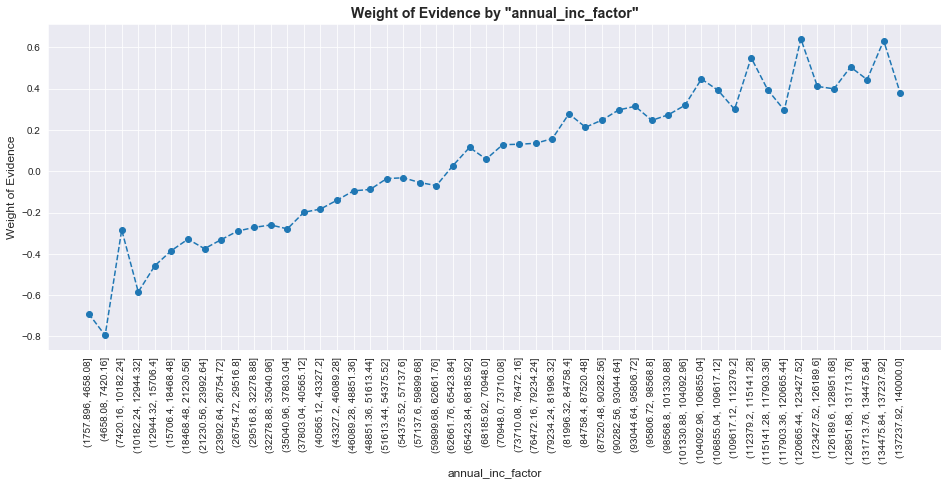

In [174]:
plot_by_woe(df_Con_Woe_IV_ann_inc,90)

- WoE is monotonically increase with income, so we split income in 10 equal categories, each with width of 15k.
- It also means The higher the Annual Income give lower probability of default (the higher the probability of being good borrower)

In [175]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### `mths _since_last_delinq`

The number of months since the borrower's last delinquency.

In [176]:
#Remember step from general preprocessing. We've got a lot of null values in this feature
print(f"Null : {df_inputs_prepr['mths_since_last_delinq'].isnull().sum()}")
print(f"Not Null : {(len(df_inputs_prepr['mths_since_last_delinq']))-(df_inputs_prepr['mths_since_last_delinq'].isnull().sum())}")

Null : 250351
Not Null : 215934


In [177]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
3       1076863    1277178      10000        10000          10000.0   
4       1075358    1311748       3000         3000           3000.0   
16      1065775    1299699      10000        10000          10000.0   
18      1062474    1294539       6000         6000           6000.0   
27      1069657    1304764       5000         5000           5000.0   
...         ...        ...        ...          ...              ...   
466277  9007579   10799568      18000        18000          17975.0   
466278  9745590   11597671      10000        10000          10000.0   
466282  9584776   11436914      20700        20700          20700.0   
466283  9604874   11457002       2000         2000           2000.0   
466284  9199665   11061576      10000        10000           9975.0   

              term  int_rate  installment grade sub_grade  ...  \
3        36 months     13.49       339.31     C        C1  ...   
4        60 months     12.69        67.79     B        B5  ...   
16       36 months     15.27       347.98     C        C4  ...   
18       36 months     11.71       198.46     B        B3  ...   
27       60 months     16.77       123.65     D        D2  ...   
...            ...       ...          ...   ...       ...  ...   
466277   36 months      7.90       563.23     A        A4  ...   
466278   36 months     18.25       362.78     D        D3  ...   
466282   60 months     16.99       514.34     D        D1  ...   
466283   36 months      7.90        62.59     A        A4  ...   
466284   36 months     19.20       367.58     D        D3  ...   

       annual_inc:30K-40K annual_inc:40K-50K annual_inc:50K-60K  \
3                       0                  1                  0   
4                       0                  0                  0   
16                      0                  1                  0   
18                      0                  0                  0   
27                      0                  0                  1   
...                   ...                ...                ...   
466277                  0                  0                  0   
466278                  0                  1                  0   
466282                  0                  1                  0   
466283                  0                  0                  0   
466284                  0                  1                  0   

        annual_inc:60K-70K annual_inc:70K-80K annual_inc:80K-90K  \
3                        0                  0                  0   
4                        0                  1                  0   
16                       0                  0                  0   
18                       0                  0                  1   
27                       0                  0                  0   
...                    ...                ...                ...   
466277                   0                  0                  1   
466278                   0                  0                  0   
466282                   0                  0                  0   
466283                   0                  0                  1   
466284                   0                  0                  0   

       annual_inc:90K-100K annual_inc:100K-120K annual_inc:120K-140K  \
3                        0                    0                    0   
4                        0                    0                    0   
16                       0                    0                    0   
18                       0                    0                    0   
27                       0                    0                    0   
...                    ...                  ...                  ...   
466277                   0                    0                    0   
466278                   0                    0                    0   
466282                   0                    0                    0   
466283                   

In [178]:
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_inputs_prepr_temp['mths_since_last_delinq_factor']

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3          (33.84, 37.6]
4          (37.6, 41.36]
16        (60.16, 63.92]
18         (7.52, 11.28]
27         (18.8, 22.56]
               ...      
466277    (11.28, 15.04]
466278    (26.32, 30.08]
466282    (63.92, 67.68]
466283    (11.28, 15.04]
466284     (7.52, 11.28]
Name: mths_since_last_delinq_factor, Length: 215934, dtype: category
Categories (50, interval[float64]): [(-0.188, 3.76] < (3.76, 7.52] < (7.52, 11.28] < (11.28, 15.04] ... (172.96, 176.72] < (176.72, 180.48] < (180.48, 184.24] < (184.24, 188.0]]

In [179]:
df_Con_Woe_IV_mths_since_last_delinq = Woe_IV_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_Con_Woe_IV_mths_since_last_delinq

mths_since_last_delinq_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                 (-0.188, 3.76]   6625   0.870943  0.129057    3.068067   
1                   (3.76, 7.52]  13834   0.886801  0.113199    6.406587   
2                  (7.52, 11.28]  16690   0.892331  0.107669    7.729214   
3                 (11.28, 15.04]  16547   0.888076  0.111924    7.662990   
4                  (15.04, 18.8]  11645   0.894805  0.105195    5.392852   
5                  (18.8, 22.56]  14579   0.892997  0.107003    6.751600   
6                 (22.56, 26.32]  13603   0.896052  0.103948    6.299610   
7                 (26.32, 30.08]  13221   0.895318  0.104682    6.122704   
8                 (30.08, 33.84]   9442   0.899492  0.100508    4.372632   
9                  (33.84, 37.6]  12168   0.898669  0.101331    5.635055   
10                 (37.6, 41.36]  11680   0.890411  0.109589    5.409060   
11                (41.36, 45.12]  11494   0.894119  0.105881    5.322923   
12                (45.12, 48.88]   8148   0.896784  0.103216    3.773375   
13                (48.88, 52.64]   8091   0.889260  0.110740    3.746978   
14                 (52.64, 56.4]   7563   0.893825  0.106175    3.502459   
15                 (56.4, 60.16]   7316   0.901449  0.098551    3.388072   
16                (60.16, 63.92]   5076   0.886525  0.113475    2.350718   
17                (63.92, 67.68]   6618   0.892415  0.107585    3.064825   
18                (67.68, 71.44]   6435   0.889666  0.110334    2.980077   
19                 (71.44, 75.2]   6157   0.888907  0.111093    2.851334   
20                 (75.2, 78.96]   4228   0.893567  0.106433    1.958006   
21                (78.96, 82.72]   4460   0.884978  0.115022    2.065446   
22                (82.72, 86.48]    118   0.796610  0.203390    0.054646   
23                (86.48, 90.24]     46   0.913043  0.086957    0.021303   
24                 (90.24, 94.0]     32   0.937500  0.062500    0.014819   
25                 (94.0, 97.76]     25   0.760000  0.240000    0.011578   
26               (97.76, 101.52]     17   0.941176  0.058824    0.007873   
27              (101.52, 105.28]     13   0.923077  0.076923    0.006020   
28              (105.28, 109.04]     11   0.818182  0.181818    0.005094   
29               (109.04, 112.8]      3   0.666667  0.333333    0.001389   
30               (112.8, 116.56]      8   0.875000  0.125000    0.003705   
31              (116.56, 120.32]      4   1.000000  0.000000    0.001852   
32              (120.32, 124.08]      4   1.000000  0.000000    0.001852   
33              (124.08, 127.84]      2   1.000000  0.000000    0.000926   
34               (127.84, 131.6]      6   1.000000  0.000000    0.002779   
35               (131.6, 135.36]      8   0.750000  0.250000    0.003705   
36              (135.36, 139.12]      2   1.000000  0.000000    0.000926   
37              (139.12, 142.88]      3   1.000000  0.000000    0.001389   
38              (142.88, 146.64]      2   1.000000  0.000000    0.000926   
39               (146.64, 150.4]      3   0.666667  0.333333    0.001389   
40               (150.4, 154.16]      2   0.500000  0.500000    0.000926   
41              (154.16, 157.92]      1   1.000000  0.000000    0.000463   
42              (157.92, 161.68]      1   1.000000  0.000000    0.000463   
43              (161.68, 165.44]      0        NaN       NaN    0.000000   
44               (165.44, 169.2]      0        NaN       NaN    0.000000   
45               (169.2, 172.96]      1   1.000000  0.000000    0.000463   
46              (172.96, 176.72]      0        NaN       NaN    0.000000   
47              (176.72, 180.48]      1   1.000000  0.000000    0.000463   
48              (180.48, 184.24]      0        NaN       NaN    0.000000   
49               (184.24, 188.0]      1   1.000000  0.000000    0.000463   

     n_good   n_bad  prop_n_good  prop_n_bad       WoE            IV  sum_IV  
0    5770.0   855.0     2.995069    3.672049 -0

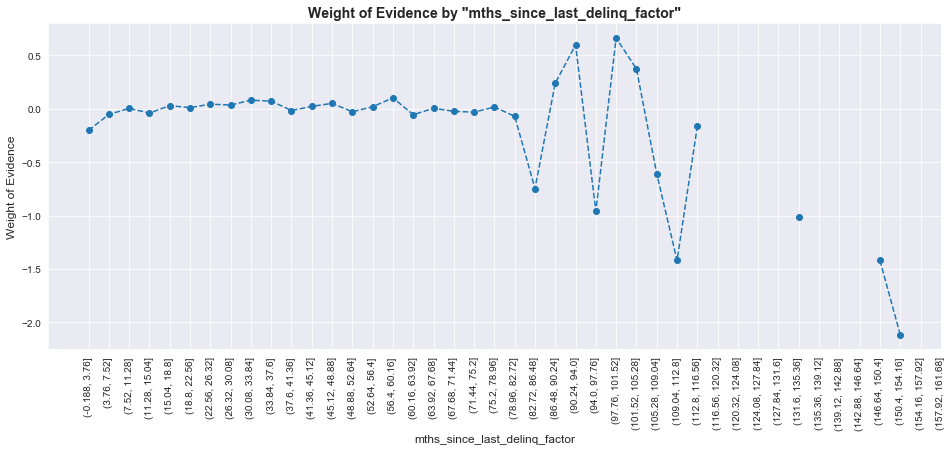

In [180]:
plot_by_woe(df_Con_Woe_IV_mths_since_last_delinq,90)

In [181]:
# Categories: Missing
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)

#0-3
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
#4-30
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
#31-56
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
#>=57
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### `dti`

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [182]:
df_inputs_prepr['dti'].unique()

array([27.65,  1.  ,  8.72, ..., 38.95, 39.82, 39.14])

In [183]:
df_inputs_prepr['dti'].nunique()

3997

In [184]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)

In [185]:
# pd.set_option('display.max_rows',None)
df_Con_Woe_IV_dti = Woe_IV_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_Con_Woe_IV_dti

dti_factor  n_obs  prop_good  prop_bad  prop_n_obs   n_good   n_bad  \
0       (-0.04, 0.8]   1924   0.896570  0.103430    0.412623   1725.0   199.0   
1         (0.8, 1.6]   2443   0.897257  0.102743    0.523928   2192.0   251.0   
2       (1.6, 2.399]   3148   0.908831  0.091169    0.675124   2861.0   287.0   
3     (2.399, 3.199]   4042   0.910440  0.089560    0.866852   3680.0   362.0   
4     (3.199, 3.999]   5171   0.909689  0.090311    1.108978   4704.0   467.0   
5     (3.999, 4.799]   6297   0.916309  0.083691    1.350462   5770.0   527.0   
6     (4.799, 5.599]   7516   0.911921  0.088079    1.611890   6854.0   662.0   
7     (5.599, 6.398]   8511   0.912936  0.087064    1.825279   7770.0   741.0   
8     (6.398, 7.198]   9664   0.914735  0.085265    2.072552   8840.0   824.0   
9     (7.198, 7.998]  10974   0.914161  0.085839    2.353496  10032.0   942.0   
10    (7.998, 8.798]  11871   0.911044  0.088956    2.545868  10815.0  1056.0   
11    (8.798, 9.598]  12910   0.907514  0.092486    2.768693  11716.0  1194.0   
12   (9.598, 10.397]  13892   0.909084  0.090916    2.979294  12629.0  1263.0   
13  (10.397, 11.197]  15016   0.903703  0.096297    3.220348  13570.0  1446.0   
14  (11.197, 11.997]  15622   0.906542  0.093458    3.350312  14162.0  1460.0   
15  (11.997, 12.797]  16572   0.901762  0.098238    3.554050  14944.0  1628.0   
16  (12.797, 13.597]  16767   0.903262  0.096738    3.595869  15145.0  1622.0   
17  (13.597, 14.396]  17140   0.898658  0.101342    3.675863  15403.0  1737.0   
18  (14.396, 15.196]  17573   0.900757  0.099243    3.768725  15829.0  1744.0   
19  (15.196, 15.996]  17317   0.897962  0.102038    3.713823  15550.0  1767.0   
20  (15.996, 16.796]  17077   0.894712  0.105288    3.662352  15279.0  1798.0   
21  (16.796, 17.596]  17188   0.887945  0.112055    3.686158  15262.0  1926.0   
22  (17.596, 18.395]  16957   0.888483  0.111517    3.636617  15066.0  1891.0   
23  (18.395, 19.195]  16475   0.886616  0.113384    3.533247  14607.0  1868.0   
24  (19.195, 19.995]  16392   0.883968  0.116032    3.515447  14490.0  1902.0   
25  (19.995, 20.795]  15603   0.881946  0.118054    3.346237  13761.0  1842.0   
26  (20.795, 21.595]  14862   0.878684  0.121316    3.187321  13059.0  1803.0   
27  (21.595, 22.394]  14149   0.875680  0.124320    3.034410  12390.0  1759.0   
28  (22.394, 23.194]  13650   0.872821  0.127179    2.927394  11914.0  1736.0   
29  (23.194, 23.994]  12794   0.875020  0.124980    2.743815  11195.0  1599.0   
30  (23.994, 24.794]  12251   0.869807  0.130193    2.627363  10656.0  1595.0   
31  (24.794, 25.594]  10672   0.874063  0.125937    2.288729   9328.0  1344.0   
32  (25.594, 26.393]   9734   0.873639  0.126361    2.087564   8504.0  1230.0   
33  (26.393, 27.193]   9036   0.868526  0.131474    1.937871   7848.0  1188.0   
34  (27.193, 27.993]   8380   0.866826  0.133174    1.797184   7264.0  1116.0   
35  (27.993, 28.793]   7936   0.866935  0.133065    1.701963   6880.0  1056.0   
36  (28.793, 29.593]   7277   0.868765  0.131235    1.560634   6322.0   955.0   
37  (29.593, 30.392]   5908   0.863913  0.136087    1.267036   5104.0   804.0   
38  (30.392, 31.192]   4783   0.863266  0.136734    1.025768   4129.0   654.0   
39  (31.192, 31.992]   4384   0.868841  0.131159    0.940198   3809.0   575.0   
40  (31.992, 32.792]   3838   0.859562  0.140438    0.823102   3299.0   539.0   
41  (32.792, 33.592]   3529   0.867951  0.132049    0.756833   3063.0   466.0   
42  (33.592, 34.391]   3296   0.866201  0.133799    0.706864   2855.0   441.0   
43  (34.391, 35.191]   2313   0.862516  0.137484    0.496049   1995.0   318.0   
44  (35.191, 35.991]    678   0.902655  0.097345    0.145405    612.0    66.0   
45  (35.991, 36.791]    674   0.878338  0.121662    0.144547    592.0    82.0   
46  (36.791, 37.591]    601   0.888519  0.111481    0.128891    534.0    67.0   
47   (37.591, 38.39]    541   0.885397  0.114603    0.116023    479.0    62.0   
48    (38.39, 39.19]    467   0.869379  0

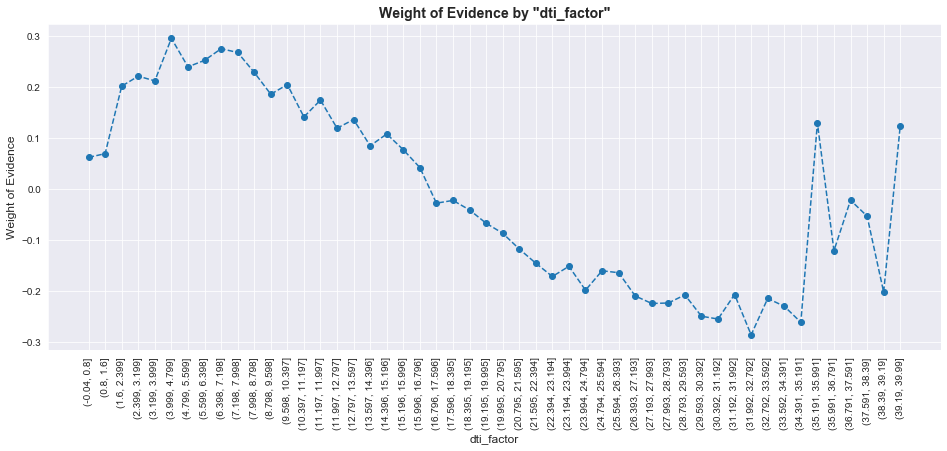

In [186]:
plot_by_woe(df_Con_Woe_IV_dti,90)

In [187]:
#<=3.99
df_inputs_prepr['dti:<=3.99'] = np.where((df_inputs_prepr['dti'] <= 3.99), 1, 0)
#4.00-8.798
df_inputs_prepr['dti:4.00-8.798'] = np.where((df_inputs_prepr['dti'] > 3.99) & (df_inputs_prepr['dti'] <= 8.798), 1, 0)
#8.798-13.597
df_inputs_prepr['dti:8.798-13.597'] = np.where((df_inputs_prepr['dti'] > 8.798) & (df_inputs_prepr['dti'] <= 13.597), 1, 0)
#13.598-16.796
df_inputs_prepr['dti:13.598-16.796'] = np.where((df_inputs_prepr['dti'] > 13.597) & (df_inputs_prepr['dti'] <= 16.796), 1, 0)
#16.797-26.393
df_inputs_prepr['dti:16.797-26.393'] = np.where((df_inputs_prepr['dti'] > 16.796) & (df_inputs_prepr['dti'] <= 26.393), 1, 0)
#26.394-31.992
df_inputs_prepr['dti:26.394-31.992'] = np.where((df_inputs_prepr['dti'] > 26.393) & (df_inputs_prepr['dti'] <= 31.992), 1, 0)
#>31.992
df_inputs_prepr['dti:>31.992'] = np.where((df_inputs_prepr['dti'] > 31.992), 1, 0)

### `mths_since_last_record`

The number of months since the last public record.

In [188]:
#Contin a lot of null
df_inputs_prepr['mths_since_last_record'].isnull().sum()

403647

In [189]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [190]:
df_Con_Woe_IV_mths_since_last_record = Woe_IV_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_Con_Woe_IV_mths_since_last_record

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_bad  prop_n_obs  \
0                 (-0.129, 2.58]   1330   0.760150  0.239850    2.123312   
1                   (2.58, 5.16]    156   0.897436  0.102564    0.249050   
2                   (5.16, 7.74]    158   0.917722  0.082278    0.252243   
3                  (7.74, 10.32]    306   0.915033  0.084967    0.488521   
4                  (10.32, 12.9]    250   0.892000  0.108000    0.399119   
5                  (12.9, 15.48]    387   0.906977  0.093023    0.617836   
6                 (15.48, 18.06]    419   0.909308  0.090692    0.668923   
7                 (18.06, 20.64]    308   0.931818  0.068182    0.491714   
8                 (20.64, 23.22]    552   0.907609  0.092391    0.881254   
9                  (23.22, 25.8]    400   0.905000  0.095000    0.638590   
10                 (25.8, 28.38]    716   0.902235  0.097765    1.143076   
11                (28.38, 30.96]    554   0.906137  0.093863    0.884447   
12                (30.96, 33.54]    893   0.920493  0.079507    1.425652   
13                (33.54, 36.12]    975   0.917949  0.082051    1.556563   
14                 (36.12, 38.7]    825   0.930909  0.069091    1.317092   
15                 (38.7, 41.28]   1242   0.919485  0.080515    1.982822   
16                (41.28, 43.86]   1006   0.924453  0.075547    1.606054   
17                (43.86, 46.44]   1549   0.923822  0.076178    2.472940   
18                (46.44, 49.02]   1712   0.921145  0.078855    2.733165   
19                 (49.02, 51.6]   1212   0.919967  0.080033    1.934928   
20                 (51.6, 54.18]   2036   0.917976  0.082024    3.250423   
21                (54.18, 56.76]   1342   0.915797  0.084203    2.142469   
22                (56.76, 59.34]   2043   0.916789  0.083211    3.261598   
23                (59.34, 61.92]   1439   0.901320  0.098680    2.297328   
24                 (61.92, 64.5]   2090   0.913397  0.086603    3.336633   
25                 (64.5, 67.08]   2032   0.924705  0.075295    3.244037   
26                (67.08, 69.66]   1289   0.905353  0.094647    2.057856   
27                (69.66, 72.24]   1903   0.909091  0.090909    3.038092   
28                (72.24, 74.82]   1155   0.901299  0.098701    1.843929   
29                 (74.82, 77.4]   1792   0.903460  0.096540    2.860883   
30                 (77.4, 79.98]   1167   0.904027  0.095973    1.863086   
31                (79.98, 82.56]   1706   0.889215  0.110785    2.723586   
32                (82.56, 85.14]   1431   0.888190  0.111810    2.284556   
33                (85.14, 87.72]   1182   0.844332  0.155668    1.887033   
34                 (87.72, 90.3]   1591   0.869893  0.130107    2.539992   
35                 (90.3, 92.88]   1192   0.864933  0.135067    1.902998   
36                (92.88, 95.46]   1970   0.859898  0.140102    3.145056   
37                (95.46, 98.04]   2195   0.868793  0.131207    3.504263   
38               (98.04, 100.62]   1558   0.877407  0.122593    2.487308   
39               (100.62, 103.2]   2514   0.876691  0.123309    4.013538   
40               (103.2, 105.78]   1899   0.883623  0.116377    3.031706   
41              (105.78, 108.36]   2908   0.879986  0.120014    4.642549   
42              (108.36, 110.94]   2030   0.892118  0.107882    3.240844   
43              (110.94, 113.52]   2658   0.883747  0.116253    4.243431   
44               (113.52, 116.1]   2552   0.876176  0.123824    4.074204   
45               (116.1, 118.68]   1550   0.901290  0.098710    2.474536   
46              (118.68, 121.26]    463   0.872570  0.127430    0.739168   
47              (121.26, 123.84]      0        NaN       NaN    0.000000   
48              (123.84, 126.42]      0        NaN       NaN    0.000000   
49               (126.42, 129.0]      1   0.000000  1.000000    0.001596   

    n_good  n_bad  prop_n_good  prop_n_bad       WoE        IV  sum_IV  
0   1011.0  319.0     1.805873    4.794109 -0.976344 

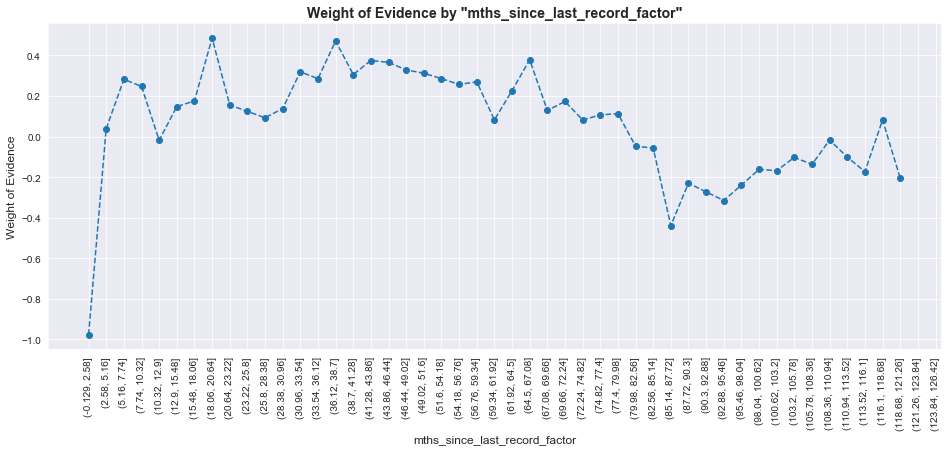

In [191]:
plot_by_woe(df_Con_Woe_IV_mths_since_last_record,90)

In [192]:
# Categories: 'Missing'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)

#'0-2'
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
#'3-20'
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
#'21-31'
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
#'32-80'
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
#'81-86'
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
#'>86'
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

## Final Data

In [199]:
df_final = pd.concat([df_inputs_prepr,df_targets_prepr],axis=1)
df_final.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... dti:26.394-31.992 dti:>31.992  \
0     10.65       162.87     B        B2  ...                 1           0   
1     15.27        59.83     C        C4  ...                 0           0   
2     15.96        84.33     C        C5  ...                 0           0   
3     13.49       339.31     C        C1  ...                 0           0   
4     12.69        67.79     B        B5  ...                 0           0   

  mths_since_last_record:Missing  mths_since_last_record:0-2  \
0                              1                           0   
1                              1                           0   
2                              1                           0   
3                              1                           0   
4                              1                           0   

  mths_since_last_record:3-20 mths_since_last_record:21-31  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

  mths_since_last_record:32-80 mths_since_last_record:81-86  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

  mths_since_last_record:>86 good_bad  
0                          0        1  
1                          0        0  
2                          0        1  
3                          0        1  
4                          0        1  

[5 rows x 317 columns]

In [201]:
df_final.shape

(466285, 317)

In [202]:
#Save to csv
# df_final.to_csv('./Data/Final_Preprocessed_Data.csv', index=False)